# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             roc_curve, precision_recall_curve)
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')

# Data Loading & Initial Inspection & Data Cleaning/Preprocessing

In [238]:
df=pd.read_excel('df_finall.xlsx')

In [240]:
df['net_personal_income']=pd.to_numeric(df['net_personal_income'],errors='coerce')
df = df.dropna(subset=['net_personal_income'])
df=df[df['net_personal_income']>=0]


In [242]:
df.shape[0]

36031

In [244]:
df[~df['age'].astype(str).str.isnumeric()]['age']

4128     Don't know
12211       Missing
16250       Missing
16251       Missing
19669       Missing
19930       Missing
23738       Missing
23739       Missing
23740       Missing
24999       Missing
28799       Missing
34382    Don't know
Name: age, dtype: object

In [246]:
df['age']=pd.to_numeric(df['age'], errors='coerce')
df=df.dropna(subset=['age'])

In [248]:
df.shape[0]

36019

In [250]:
df['age']=df['age'].astype(int)

In [252]:
df['fruit_days_per_week'].value_counts()

fruit_days_per_week
4             14056
2             10518
3              7711
1              2583
Proxy          1093
Don't know       36
Refusal          22
Name: count, dtype: int64

In [254]:
df['fruit_days_per_week'] = df['fruit_days_per_week'].replace(['Proxy', "Don't know", 'Refusal'], np.nan)
df = df.dropna(subset=['fruit_days_per_week'])

df['fruit_days_per_week'] = df['fruit_days_per_week'].astype(int)

fruit_mapping = {
    1: "Never",
    2: "1-3 Days",
    3: "4-6 Days",
    4: "Every Day"
}

df['fruit_days_per_week'] = df['fruit_days_per_week'].map(fruit_mapping)
df['fruit_days_per_week'] = df['fruit_days_per_week'].astype('string')

In [256]:
df['mental_health_binary'].value_counts()
# df['fruit_days_per_week'].value_counts()

mental_health_binary
Good Mental Health    20527
Poor Mental Health    12677
Unknown                1664
Name: count, dtype: int64

In [258]:
df.groupby('fruit_days_per_week')['mental_health_binary'].value_counts(normalize='true')

fruit_days_per_week  mental_health_binary
1-3 Days             Good Mental Health      0.545446
                     Poor Mental Health      0.402738
                     Unknown                 0.051816
4-6 Days             Good Mental Health      0.598625
                     Poor Mental Health      0.366619
                     Unknown                 0.034756
Every Day            Good Mental Health      0.631545
                     Poor Mental Health      0.319223
                     Unknown                 0.049232
Never                Good Mental Health      0.502129
                     Poor Mental Health      0.436314
                     Unknown                 0.061556
Name: proportion, dtype: float64

In [260]:
df['vigorous_days_per_week'].value_counts()

vigorous_days_per_week
0             19416
2              3383
3              3001
1              2891
5              2053
4              1881
7              1343
6               680
Don't know      183
Refusal          37
Name: count, dtype: int64

In [262]:
df.groupby('vigorous_days_per_week')['mental_health_binary'].value_counts(normalize='true')

vigorous_days_per_week  mental_health_binary
0                       Good Mental Health      0.541718
                        Poor Mental Health      0.393490
                        Unknown                 0.064792
1                       Good Mental Health      0.614666
                        Poor Mental Health      0.361813
                        Unknown                 0.023521
2                       Good Mental Health      0.648537
                        Poor Mental Health      0.327816
                        Unknown                 0.023648
3                       Good Mental Health      0.652116
                        Poor Mental Health      0.326558
                        Unknown                 0.021326
4                       Good Mental Health      0.682616
                        Poor Mental Health      0.296651
                        Unknown                 0.020734
5                       Good Mental Health      0.650268
                        Poor Mental Health 

In [264]:
df['vigorous_days_per_week']=pd.to_numeric(df['vigorous_days_per_week'], errors='coerce')
df=df.dropna(subset='vigorous_days_per_week')
df['vigorous_days_per_week']=df['vigorous_days_per_week'].astype(int)

In [266]:
df['vigorous_days_per_week'].value_counts()

vigorous_days_per_week
0    19416
2     3383
3     3001
1     2891
5     2053
4     1881
7     1343
6      680
Name: count, dtype: int64

In [268]:
df['moderate_days_per_week']=pd.to_numeric(df['moderate_days_per_week'], errors='coerce')
df=df.dropna(subset='moderate_days_per_week')
df['moderate_days_per_week']=df['moderate_days_per_week'].astype(int)

In [270]:
df['moderate_days_per_week'].value_counts()

moderate_days_per_week
0    17145
2     3557
7     3368
3     2911
1     2497
5     2442
4     1683
6      786
Name: count, dtype: int64

In [272]:
df.shape[0]

34389

In [274]:
df=df[~(df['mental_health_binary']=='Unknown')]

In [276]:
# CATEGORICAL COLS

In [278]:
str_cols=['loneliness_frequency','lack_companionship','fruit_days_per_week','income_satisfaction','leisure_satisfaction',
                    'loneliness_frequency','isolation_frequency','lack_companionship',
                    'feeling_left_out','smoking_status','drinks_alcohol_past12m',
                    'alcohol_frequency_12m','drinks_per_typical_day',
                    'employment_status','job_satisfaction','current_financial_situation',
                    'future_financial_outlook','gender','marital_status','education_level',
                    'urban_rural','country','region']


In [280]:
df['alcohol_frequency_12m'].value_counts()

alcohol_frequency_12m
Inapplicable         7293
2-4 times a month    7151
Monthly or less      6995
2-3 times a week     6975
4+ times a week      4179
Never                 161
Refusal                20
Don't know              9
Name: count, dtype: int64

In [282]:
df['health_satisfaction'].value_counts()

health_satisfaction
Mostly satisfied           12296
Somewhat satisfied          5374
Somewhat dissatisfied       4774
Completely satisfied        3252
Neutral                     2945
Mostly dissatisfied         2758
Completely dissatisfied     1340
Refusal                       25
Missing                       15
Don't know                     4
Name: count, dtype: int64

In [284]:
df=df[~((df['health_satisfaction']=='Refusal') | (df['health_satisfaction']=='Missing') | (df['health_satisfaction']=="Don't know"))]

In [286]:
df['health_satisfaction']=df['health_satisfaction'].astype('string')

In [288]:
df['income_satisfaction'].value_counts()

income_satisfaction
Mostly satisfied           10464
Somewhat satisfied          6788
Neutral                     4245
Somewhat dissatisfied       4047
Completely satisfied        3528
Mostly dissatisfied         2405
Completely dissatisfied     1254
Don't know                     4
Refusal                        4
Name: count, dtype: int64

In [290]:
df['income_satisfaction'] = df['income_satisfaction'].astype('string')
df = df[~df['income_satisfaction'].isin(["Don't know", "Refusal"])]


In [292]:
df['income_satisfaction'].value_counts()

income_satisfaction
Mostly satisfied           10464
Somewhat satisfied          6788
Neutral                     4245
Somewhat dissatisfied       4047
Completely satisfied        3528
Mostly dissatisfied         2405
Completely dissatisfied     1254
Name: count, dtype: Int64

In [294]:
df.groupby('income_satisfaction')['mental_health_binary'].value_counts(normalize='true')

income_satisfaction      mental_health_binary
Completely dissatisfied  Poor Mental Health      0.706539
                         Good Mental Health      0.293461
Completely satisfied     Good Mental Health      0.802438
                         Poor Mental Health      0.197562
Mostly dissatisfied      Poor Mental Health      0.585863
                         Good Mental Health      0.414137
Mostly satisfied         Good Mental Health      0.758888
                         Poor Mental Health      0.241112
Neutral                  Poor Mental Health      0.501296
                         Good Mental Health      0.498704
Somewhat dissatisfied    Poor Mental Health      0.576971
                         Good Mental Health      0.423029
Somewhat satisfied       Good Mental Health      0.629788
                         Poor Mental Health      0.370212
Name: proportion, dtype: float64

In [296]:
income_map = {
    'Completely satisfied': 'Satisfied',
    'Mostly satisfied': 'Satisfied',
    'Somewhat satisfied': 'Satisfied',
    'Neutral': 'Neutral',
    'Somewhat dissatisfied': 'Dissatisfied',
    'Mostly dissatisfied': 'Dissatisfied',
    'Completely dissatisfied': 'Dissatisfied'
}

df['income_satisfaction_binned'] = df['income_satisfaction'].replace(income_map)
print(df['income_satisfaction_binned'].value_counts())


income_satisfaction_binned
Satisfied       20780
Dissatisfied     7706
Neutral          4245
Name: count, dtype: Int64


In [298]:
df['leisure_satisfaction'].value_counts()

leisure_satisfaction
Mostly satisfied           8711
Somewhat satisfied         6750
Completely satisfied       5168
Neutral                    4513
Somewhat dissatisfied      4325
Mostly dissatisfied        2240
Completely dissatisfied    1022
Refusal                       1
Don't know                    1
Name: count, dtype: int64

In [300]:
df.groupby('leisure_satisfaction')['mental_health_binary'].value_counts(normalize='true')

leisure_satisfaction     mental_health_binary
Completely dissatisfied  Poor Mental Health      0.633072
                         Good Mental Health      0.366928
Completely satisfied     Good Mental Health      0.813274
                         Poor Mental Health      0.186726
Don't know               Good Mental Health      1.000000
Mostly dissatisfied      Poor Mental Health      0.566964
                         Good Mental Health      0.433036
Mostly satisfied         Good Mental Health      0.744346
                         Poor Mental Health      0.255654
Neutral                  Poor Mental Health      0.553512
                         Good Mental Health      0.446488
Refusal                  Good Mental Health      1.000000
Somewhat dissatisfied    Poor Mental Health      0.539884
                         Good Mental Health      0.460116
Somewhat satisfied       Good Mental Health      0.622370
                         Poor Mental Health      0.377630
Name: proportion, dtype: f

In [302]:
df['leisure_satisfaction'] = df['leisure_satisfaction'].astype('string')
df = df[~df['leisure_satisfaction'].isin(["Don't know", "Refusal"])]


In [304]:
leisure_map = {
    'Completely satisfied': 'Satisfied',
    'Mostly satisfied': 'Satisfied',
    'Somewhat satisfied': 'Satisfied',
    'Neutral': 'Neutral',
    'Somewhat dissatisfied': 'Dissatisfied',
    'Mostly dissatisfied': 'Dissatisfied',
    'Completely dissatisfied': 'Dissatisfied'
}

df['leisure_satisfaction_binned'] = df['leisure_satisfaction'].replace(leisure_map)
print(df['leisure_satisfaction_binned'].value_counts(normalize=True))


leisure_satisfaction_binned
Satisfied       0.630297
Dissatisfied    0.231813
Neutral          0.13789
Name: proportion, dtype: Float64


In [306]:
df['loneliness_frequency'].value_counts()

loneliness_frequency
Hardly ever/never    20814
Some of the time      9302
Often                 2584
Refusal                 21
Don't know               5
Missing                  3
Name: count, dtype: int64

In [308]:
df['loneliness_frequency'] = df['loneliness_frequency'].astype('string')
df = df[~df['loneliness_frequency'].isin(["Don't know", "Refusal","Missing"])]


In [310]:
df['loneliness_frequency'].value_counts()

loneliness_frequency
Hardly ever/never    20814
Some of the time      9302
Often                 2584
Name: count, dtype: Int64

In [312]:
# Yuksek korelyasiya, daxil etmek istemirem
df['isolation_frequency'].value_counts()

isolation_frequency
Hardly ever/never    21683
Some of the time      8773
Often                 2236
Don't know               8
Name: count, dtype: int64

In [314]:
df['isolation_frequency'] = df['isolation_frequency'].astype('string')
df = df[~df['isolation_frequency'].isin(["Don't know"])]

In [316]:
df.shape[0]

32692

In [318]:
df['lack_companionship'].value_counts()

lack_companionship
Hardly ever/never    19489
Some of the time     10626
Often                 2570
Don't know               6
Refusal                  1
Name: count, dtype: int64

In [320]:
df['lack_companionship'] = df['lack_companionship'].astype('string')
df = df[~df['lack_companionship'].isin(["Don't know",'Refusal'])]

In [322]:
#Bunu da daxil etmeyecem helelik
df['feeling_left_out'].value_counts()

feeling_left_out
Hardly ever/never    20985
Some of the time      9719
Often                 1975
Don't know               4
Refusal                  2
Name: count, dtype: int64

In [324]:
df['feeling_left_out'] = df['feeling_left_out'].astype('string')
df = df[~df['feeling_left_out'].isin(["Don't know",'Refusal'])]

In [326]:
df['smoking_status'].value_counts()

smoking_status
No            28298
Yes            4375
Refusal           5
Don't know        1
Name: count, dtype: int64

In [328]:
df['smoking_status'] = df['smoking_status'].astype('string')
df = df[~df['smoking_status'].isin(["Don't know",'Refusal'])]

In [330]:
df.shape[0]

32673

In [332]:
df['drinks_alcohol_past12m'].value_counts()

drinks_alcohol_past12m
Yes           25441
No             7221
Refusal           7
Don't know        4
Name: count, dtype: int64

In [334]:
df['drinks_alcohol_past12m'] = df['drinks_alcohol_past12m'].astype('string')
df = df[~df['drinks_alcohol_past12m'].isin(["Don't know",'Refusal'])]

In [336]:
df['alcohol_frequency_12m'].value_counts()

alcohol_frequency_12m
Inapplicable         7221
2-4 times a month    7135
Monthly or less      6980
2-3 times a week     6968
4+ times a week      4174
Never                 159
Refusal                17
Don't know              8
Name: count, dtype: int64

In [338]:
df.groupby('alcohol_frequency_12m')['mental_health_binary'].value_counts(normalize='true')

alcohol_frequency_12m  mental_health_binary
2-3 times a week       Good Mental Health      0.659443
                       Poor Mental Health      0.340557
2-4 times a month      Good Mental Health      0.626209
                       Poor Mental Health      0.373791
4+ times a week        Good Mental Health      0.655726
                       Poor Mental Health      0.344274
Don't know             Good Mental Health      0.625000
                       Poor Mental Health      0.375000
Inapplicable           Good Mental Health      0.580806
                       Poor Mental Health      0.419194
Monthly or less        Good Mental Health      0.587679
                       Poor Mental Health      0.412321
Never                  Good Mental Health      0.540881
                       Poor Mental Health      0.459119
Refusal                Good Mental Health      0.588235
                       Poor Mental Health      0.411765
Name: proportion, dtype: float64

In [340]:
df['alcohol_frequency_12m']=df['alcohol_frequency_12m'].replace({'Never':'Non-Drinker','Inapplicable': 'Non-Drinker'})
df=df[~((df['alcohol_frequency_12m']=='Refusal') | (df['alcohol_frequency_12m']=="Don't know"))]

In [342]:
df['alcohol_frequency_12m'].value_counts()

alcohol_frequency_12m
Non-Drinker          7380
2-4 times a month    7135
Monthly or less      6980
2-3 times a week     6968
4+ times a week      4174
Name: count, dtype: int64

In [344]:
df.shape[0]

32637

In [346]:

df['drinks_per_typical_day'].value_counts()

drinks_per_typical_day
1-2 drinks      14751
Inapplicable     7221
3-4 drinks       6722
5-6 drinks       2689
7-9 drinks        749
10+ drinks        416
Don't know         49
Refusal            39
Missing             1
Name: count, dtype: int64

In [348]:
# Replace Inapplicable -> Nondrinker
df['drinks_per_typical_day'] = df['drinks_per_typical_day'].replace({
    'Inapplicable': 'Nondrinker'
})

# Remove Refusal, Don't know, Missing
df = df[~df['drinks_per_typical_day'].isin(['Refusal', "Don't know", 'Missing'])]


In [350]:
df['drinks_per_typical_day'].value_counts()
df.groupby('drinks_per_typical_day')['mental_health_binary'].value_counts(normalize='true')

drinks_per_typical_day  mental_health_binary
1-2 drinks              Good Mental Health      0.649922
                        Poor Mental Health      0.350078
10+ drinks              Good Mental Health      0.507212
                        Poor Mental Health      0.492788
3-4 drinks              Good Mental Health      0.618417
                        Poor Mental Health      0.381583
5-6 drinks              Good Mental Health      0.592042
                        Poor Mental Health      0.407958
7-9 drinks              Good Mental Health      0.510013
                        Poor Mental Health      0.489987
Nondrinker              Good Mental Health      0.580806
                        Poor Mental Health      0.419194
Name: proportion, dtype: float64

In [352]:
alcohol_4_groups = {
    'Nondrinker': 'Non_Drinker',
    '1-2 drinks': 'Light_Drinking',
    '3-4 drinks': 'Moderate_Drinking', 
    '5-6 drinks': 'Heavy_Drinking',
    '7-9 drinks': 'Heavy_Drinking',
    '10+ drinks': 'Heavy_Drinking'
}
df['drinks_per_typical_day_binned']=df['drinks_per_typical_day'].map(alcohol_4_groups)

In [354]:
df['drinks_per_typical_day_binned'].value_counts()

drinks_per_typical_day_binned
Light_Drinking       14751
Non_Drinker           7221
Moderate_Drinking     6722
Heavy_Drinking        3854
Name: count, dtype: int64

In [356]:
df['employment_status'].value_counts()

employment_status
In paid employment           15744
Retired                       8195
Self-employed                 2591
Full-time student             1949
Looking after home/family     1309
Unemployed                    1225
Long-term sick/disabled       1046
Doing something else           212
Maternity leave                177
On apprenticeship               62
Unpaid, family business         20
Govt training scheme            11
Refusal                          6
Missing                          1
Name: count, dtype: int64

In [358]:
df = df[~df['employment_status'].isin(['Refusal', 'Missing'])]


In [360]:
df.groupby('employment_status')['mental_health_binary'].value_counts(normalize='true')

employment_status          mental_health_binary
Doing something else       Poor Mental Health      0.528302
                           Good Mental Health      0.471698
Full-time student          Good Mental Health      0.575680
                           Poor Mental Health      0.424320
Govt training scheme       Good Mental Health      0.545455
                           Poor Mental Health      0.454545
In paid employment         Good Mental Health      0.624047
                           Poor Mental Health      0.375953
Long-term sick/disabled    Poor Mental Health      0.809751
                           Good Mental Health      0.190249
Looking after home/family  Good Mental Health      0.520244
                           Poor Mental Health      0.479756
Maternity leave            Good Mental Health      0.638418
                           Poor Mental Health      0.361582
On apprenticeship          Good Mental Health      0.709677
                           Poor Mental Health      0

In [362]:
# Mapping dictionary
employment_map = {
    'In paid employment': 'Employed',
    'Self-employed': 'Employed',
    'Full-time student': 'Student/Apprentice',
    'On apprenticeship': 'Student/Apprentice',
    'Looking after home/family': 'Home/Family',
    'Maternity leave': 'Home/Family',
    'Retired': 'Retired/Elderly',
    'Long-term sick/disabled': 'Sick/Disabled',
    'Unemployed': 'Unemployed/Other',
    'Doing something else': 'Unemployed/Other',
    'Unpaid, family business': 'Unemployed/Other',
    'Govt training scheme': 'Student/Apprentice'
}
df['employment_status_binned'] = df['employment_status'].map(employment_map)
df['employment_status_binned']=df['employment_status_binned'].astype('string')

In [364]:
df['employment_status_binned'].value_counts()

employment_status_binned
Employed              18335
Retired/Elderly        8195
Student/Apprentice     2022
Home/Family            1486
Unemployed/Other       1457
Sick/Disabled          1046
Name: count, dtype: Int64

In [366]:
df['job_satisfaction'].value_counts()

job_satisfaction
Inapplicable    13583
6                7592
5                4299
7                3236
4                1551
3                1418
2                 560
1                 279
Refusal            13
Don't know         10
Name: count, dtype: int64

In [368]:
df = df[~df['job_satisfaction'].isin(['Refusal', "Don't know"])]
df['job_satisfaction']=df['job_satisfaction'].replace({'Inapplicable':'Unemployed'})

In [370]:
df['job_satisfaction'] = df['job_satisfaction'].astype(str)

# Bin yaratmaq
def bin_job_satisfaction(x):
    if x in ['1','2','3']:
        return 'Low'
    elif x in ['4','5']:
        return 'Medium'
    elif x in ['6','7']:
        return 'High'
    else:
        return 'Unemployed'
    

df['job_satisfaction_binned'] = df['job_satisfaction'].apply(bin_job_satisfaction)


In [372]:
df['job_satisfaction_binned'].value_counts()

job_satisfaction_binned
Unemployed    13583
High          10828
Medium         5850
Low            2257
Name: count, dtype: int64

In [374]:
df['current_financial_situation'].value_counts()

current_financial_situation
Doing alright                 13200
Living comfortably            10064
Just about getting by          6737
Finding it quite difficult     1799
Finding it very difficult       663
Don't know                       32
Refusal                          23
Name: count, dtype: int64

In [376]:
df=df[~((df['current_financial_situation']=="Don't know") |(df['current_financial_situation']=="Refusal"))]

In [378]:
df['current_financial_situation_binned'] = df['current_financial_situation'].replace({
    'Doing alright': 'Comfortable',
    'Living comfortably': 'Comfortable',
    'Just about getting by': 'Moderate',
    'Finding it quite difficult': 'Struggling',
    'Finding it very difficult': 'Struggling'
})


In [380]:
df['current_financial_situation_binned'].value_counts()

current_financial_situation_binned
Comfortable    23264
Moderate        6737
Struggling      2462
Name: count, dtype: int64

In [382]:
df['future_financial_outlook'].value_counts()

future_financial_outlook
About the same        20413
Better off             7579
Worse off than now     4044
Don't know              426
Refusal                   1
Name: count, dtype: int64

In [384]:
df=df[~(df['future_financial_outlook']=='Refusal')]
df['future_financial_outlook'].value_counts()
df.groupby('future_financial_outlook')['mental_health_binary'].value_counts(normalize='true')

future_financial_outlook  mental_health_binary
About the same            Good Mental Health      0.649978
                          Poor Mental Health      0.350022
Better off                Good Mental Health      0.625148
                          Poor Mental Health      0.374852
Don't know                Poor Mental Health      0.514085
                          Good Mental Health      0.485915
Worse off than now        Poor Mental Health      0.538576
                          Good Mental Health      0.461424
Name: proportion, dtype: float64

In [386]:
df[~((df['future_financial_outlook']=="Don't know")|(df['future_financial_outlook']=="Refusal"))]

,mental_distress_score,mental_health_caseness,physical_health_score,mental_component_score,health_satisfaction,income_satisfaction,leisure_satisfaction,loneliness_frequency,isolation_frequency,lack_companionship,...,urban_rural,country,region,mental_health_binary,income_satisfaction_binned,leisure_satisfaction_binned,drinks_per_typical_day_binned,employment_status_binned,job_satisfaction_binned,current_financial_situation_binned
0,10,1,59.64,49.35,Mostly satisfied,Mostly satisfied,Mostly satisfied,Some of the time,Hardly ever/never,Some of the time,...,Urban,England,North East,Good Mental Health,Satisfied,Satisfied,Light_Drinking,Employed,Low,Comfortable
1,11,0,26.59,39.88,Mostly dissatisfied,Somewhat dissatisfied,Somewhat dissatisfied,Some of the time,Some of the time,Hardly ever/never,...,Urban,England,North East,Good Mental Health,Dissatisfied,Dissatisfied,Light_Drinking,Home/Family,Unemployed,Comfortable
2,28,12,39.16,15.56,Completely dissatisfied,Completely dissatisfied,Neutral,Some of the time,Some of the time,Hardly ever/never,...,Urban,England,North East,Poor Mental Health,Dissatisfied,Neutral,Non_Drinker,Sick/Disabled,Unemployed,Moderate
3,27,12,20.16,33.4,Completely dissatisfied,Mostly dissatisfied,Mostly dissatisfied,Some of the time,Some of the time,Some of the time,...,Urban,England,North East,Poor Mental Health,Dissatisfied,Dissatisfied,Non_Drinker,Retired/Elderly,Unemployed,Comfortable
4,12,1,33.87,44.69,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,Some of the time,Some of the time,Some of the time,...,Urban,England,North East,Poor Mental Health,Satisfied,Satisfied,Non_Drinker,Employed,Unemployed,Comfortable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36053,7,0,59.11,54.1,Completely satisfied,Completely satisfied,Completely satisfied,Hardly ever/never,Hardly ever/never,Hardly ever/never,...,Urban,England,South West,Good Mental Health,Satisfied,Satisfied,Moderate_Drinking,Employed,High,Comfortable
36054,7,0,57.76,57.06,Completely satisfied,Completely satisfied,Completely satisfied,Hardly ever/never,Hardly ever/never,Hardly ever/never,...,Urban,England,South West,Good Mental Health,Satisfied,Satisfied,Moderate_Drinking,Retired/Elderly,Unemployed,Comfortable
36055,11,0,57.29,49.42,Completely dissatisfied,Somewhat dissatisfied,Mostly dissatisfied,Hardly ever/never,Hardly ever/never,Some of the time,...,Urban,England,South West,Good Mental Health,Dissatisfied,Dissatisfied,Moderate_Drinking,Employed,Medium,Moderate
36056,8,0,55.6,52.23,Mostly satisfied,Somewhat satisfied,Somewhat satisfied,Hardly ever/never,Hardly ever/never,Hardly ever/never,...,Urban,England,South West,Good Mental Health,Satisfied,Satisfied,Light_Drinking,Employed,High,Moderate


In [388]:
df['future_financial_outlook'].value_counts()

future_financial_outlook
About the same        20413
Better off             7579
Worse off than now     4044
Don't know              426
Name: count, dtype: int64

In [390]:
df['future_financial_outlook_binned']=df['future_financial_outlook']
df['future_financial_outlook_binned'] = df['future_financial_outlook'].replace({
    'Worse off than now': 'Negative/Uncertain',
    "Don't know": 'Negative/Uncertain'
})

In [392]:
df['future_financial_outlook_binned'].value_counts()

future_financial_outlook_binned
About the same        20413
Better off             7579
Negative/Uncertain     4470
Name: count, dtype: int64

In [394]:
# gender temizdir

In [396]:
df['marital_status'].value_counts()
df=df[~(df['marital_status']=='Missing')]
df['marital_status'].value_counts()

marital_status
Married/Civil partner    17398
Never married             7241
Living as couple          3286
Divorced                  2056
Widowed                   1882
Separated                  510
Name: count, dtype: int64

In [398]:
df['marital_status_binned']=df['marital_status']
df['marital_status_binned'] = df['marital_status'].replace({
    'Divorced': 'Previously Married',
    'Separated': 'Previously Married'
})


In [400]:
df['marital_status_binned'].value_counts()

marital_status_binned
Married/Civil partner    17398
Never married             7241
Living as couple          3286
Previously Married        2566
Widowed                   1882
Name: count, dtype: int64

In [402]:
df.groupby('marital_status')['mental_health_binary'].value_counts(normalize='true')

marital_status         mental_health_binary
Divorced               Good Mental Health      0.557393
                       Poor Mental Health      0.442607
Living as couple       Good Mental Health      0.582167
                       Poor Mental Health      0.417833
Married/Civil partner  Good Mental Health      0.658581
                       Poor Mental Health      0.341419
Never married          Good Mental Health      0.559453
                       Poor Mental Health      0.440547
Separated              Poor Mental Health      0.507843
                       Good Mental Health      0.492157
Widowed                Good Mental Health      0.641870
                       Poor Mental Health      0.358130
Name: proportion, dtype: float64

In [404]:
df['education_level'].value_counts()
df=df[~((df['education_level']=='Cert 6th year studies') | (df['education_level']=='Welsh baccalaureate'))]
df['education_level'].value_counts()

education_level
None of the above              5906
GCSE/O level                   5895
Inapplicable                   4580
1st degree or equivalent       4527
Higher degree                  3328
A level                        2443
Diploma in higher ed           1936
CSE                             878
Nursing/other medical qual      575
Other school cert               509
AS level                        484
Teaching qual not pgce          458
Standard/ordinary/lower         368
Highers (Scotland)              299
Other higher degree              52
International baccalaureate      24
Missing                          23
Name: count, dtype: int64

In [406]:
df.groupby('education_level')['mental_health_binary'].value_counts(normalize='true')

education_level              mental_health_binary
1st degree or equivalent     Good Mental Health      0.628452
                             Poor Mental Health      0.371548
A level                      Good Mental Health      0.605403
                             Poor Mental Health      0.394597
AS level                     Good Mental Health      0.551653
                             Poor Mental Health      0.448347
CSE                          Good Mental Health      0.566059
                             Poor Mental Health      0.433941
Diploma in higher ed         Good Mental Health      0.616736
                             Poor Mental Health      0.383264
GCSE/O level                 Good Mental Health      0.608991
                             Poor Mental Health      0.391009
Higher degree                Good Mental Health      0.649639
                             Poor Mental Health      0.350361
Highers (Scotland)           Good Mental Health      0.585284
                    

In [408]:
df=df[~(df['education_level']=='Missing')]

In [410]:
education_map = {
    'Higher degree': 'Higher Education',
    '1st degree or equivalent': 'Higher Education',
    'Diploma in higher ed': 'Higher Education',
    'Other higher degree': 'Higher Education',
    'Teaching qual not pgce': 'Higher Education',
    'International baccalaureate': 'Higher Education',
    'A level': 'Secondary Education',
    'AS level': 'Secondary Education',
    'CSE': 'Secondary Education',
    'GCSE/O level': 'Secondary Education',
    'Highers (Scotland)': 'Secondary Education',
    'Standard/ordinary/lower': 'Secondary Education',
    'Nursing/other medical qual': 'Vocational/Medical',
    'Other school cert': 'Vocational/Medical',
  }

df['education_level_binned'] = df['education_level'].replace(education_map)

In [412]:
df['education_level_binned'].value_counts()

education_level_binned
Secondary Education    10367
Higher Education       10325
None of the above       5906
Inapplicable            4580
Vocational/Medical      1084
Name: count, dtype: int64

In [414]:
df=df[~(df['urban_rural']=='Missing')]
df['urban_rural'].value_counts()


urban_rural
Urban    24237
Rural     8012
Name: count, dtype: int64

In [416]:
df=df[~(df['country']=='Missing')]
df['country'].value_counts()

country
England             25254
Scotland             2791
Wales                2114
Northern Ireland     2090
Name: count, dtype: int64

In [418]:
# regionu modele daxil etmek istemirem

df['region'].value_counts()

region
South East                  3907
London                      3687
North West                  3338
Scotland                    2791
West Midlands               2745
East of England             2718
Yorkshire and the Humber    2690
South West                  2671
East Midlands               2333
Wales                       2114
Northern Ireland            2090
North East                  1165
Name: count, dtype: int64

In [420]:
df['smoking_status'].value_counts()                                     

smoking_status
No     27933
Yes     4316
Name: count, dtype: Int64

In [422]:
df['drinks_alcohol_past12m'].value_counts()

drinks_alcohol_past12m
Yes    25127
No      7122
Name: count, dtype: Int64

In [424]:
categorical_cols = ['lack_companionship','loneliness_frequency','employment_status_binned','job_satisfaction_binned',
                    'current_financial_situation_binned','marital_status_binned', 'fruit_days_per_week',
                    'future_financial_outlook_binned','education_level_binned',
                    'income_satisfaction_binned','leisure_satisfaction_binned',
                    'drinks_per_typical_day_binned','smoking_status','drinks_alcohol_past12m',
                    'alcohol_frequency_12m','gender','urban_rural','country']

for col in categorical_cols:
    df[col] = df[col].astype('string')

In [426]:
# Object tipli bütün sütunları string tipinə çevir
df = df.apply(lambda col: col.astype('string') if col.dtype == 'object' else col)


In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32249 entries, 0 to 36057
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   mental_distress_score               32249 non-null  string 
 1   mental_health_caseness              32249 non-null  string 
 2   physical_health_score               32249 non-null  string 
 3   mental_component_score              32249 non-null  string 
 4   health_satisfaction                 32249 non-null  string 
 5   income_satisfaction                 32249 non-null  string 
 6   leisure_satisfaction                32249 non-null  string 
 7   loneliness_frequency                32249 non-null  string 
 8   isolation_frequency                 32249 non-null  string 
 9   lack_companionship                  32249 non-null  string 
 10  feeling_left_out                    32249 non-null  string 
 11  smoking_status                      32249 non-

In [430]:
numeric_features = [ 'net_personal_income', 'age', 'household_size', 
                    'number_of_children', 'vigorous_days_per_week', 'moderate_days_per_week']

for col in numeric_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')  

for i in numeric_features:
    print(df[i].isnull().sum())

0
0
0
0
0
0


In [432]:
df['health_satisfaction'].value_counts()

health_satisfaction
Mostly satisfied           12154
Somewhat satisfied          5300
Somewhat dissatisfied       4700
Completely satisfied        3187
Neutral                     2869
Mostly dissatisfied         2720
Completely dissatisfied     1319
Name: count, dtype: Int64

In [434]:
# Yeni binned xüsusiyyətin yaradılması üçün mapping
health_satisfaction_binning = {
    'Completely dissatisfied': 'Dissatisfied',
    'Mostly dissatisfied': 'Dissatisfied',
    'Somewhat dissatisfied': 'Dissatisfied',
    'Neutral': 'Neutral',
    'Somewhat satisfied': 'Satisfied',
    'Mostly satisfied': 'Satisfied',
    'Completely satisfied': 'Satisfied'
}

# DataFrame-də yeni xüsusiyyəti yaratmaq üçün kod
df['health_satisfaction_binned'] = df['health_satisfaction'].map(health_satisfaction_binning)

print(df['health_satisfaction_binned'].value_counts())

health_satisfaction_binned
Satisfied       20641
Dissatisfied     8739
Neutral          2869
Name: count, dtype: int64


In [437]:
def proper_encoding_and_analysis(df, target_col='mental_health_binary'):
    """
    Train/test split edib düzgün encoding və univariate analysis
    """
    
    # Define feature categories
    numeric_features = [
        'net_personal_income', 'age', 'household_size', 'number_of_children',
        'vigorous_days_per_week', 'moderate_days_per_week'
    ]
    
    binary_features = ['smoking_status', 'drinks_alcohol_past12m', 'gender']
    
    mean_encoding_features = [
        'health_satisfaction_binned','income_satisfaction_binned', 'leisure_satisfaction_binned', 'alcohol_frequency_12m',
        'drinks_per_typical_day_binned', 'employment_status_binned', 'job_satisfaction_binned',
        'current_financial_situation_binned', 'future_financial_outlook_binned', 'marital_status_binned',
        'education_level_binned', 'urban_rural', 'country'
    ]
    
    all_features = numeric_features + binary_features + mean_encoding_features
    
    print("PROPER ENCODING STRATEGY WITH TRAIN/TEST SPLIT")
    print("="*60)
    
    # Target-ı numeric-ə çevir
    y = (df[target_col] == 'Poor Mental Health').astype(int)
    
    # Train/test split (encoding-dən əvvəl!)
    X = df[all_features].copy()
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    print(f"Train set: {X_train.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")
    print(f"Train target rate: {y_train.mean():.3f}")
    print(f"Test target rate: {y_test.mean():.3f}")
    
    # Create encoded datasets
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()
    
    results = []
    
    print("\nENCODING AND ANALYSIS:")
    print("-"*40)
    
    # 1. NUMERIC FEATURES (standardize)
    print("\n NUMERIC FEATURES:")
    for feature in numeric_features:
        if feature in X_train.columns:
            try:
                # Convert to numeric and handle missing/special values
                X_train_numeric = pd.to_numeric(X_train[feature], errors='coerce')
                X_test_numeric = pd.to_numeric(X_test[feature], errors='coerce')
                
                train_median = X_train_numeric.median()
                X_train_encoded[f'{feature}_scaled'] = X_train_numeric.fillna(train_median)
                X_test_encoded[f'{feature}_scaled'] = X_test_numeric.fillna(train_median)
                X_test_encoded[f'{feature}_scaled'] = X_test[feature].fillna(train_median)
                
                # Standardize
                scaler = StandardScaler()
                X_train_encoded[f'{feature}_scaled'] = scaler.fit_transform(
                    X_train_encoded[f'{feature}_scaled'].values.reshape(-1, 1)
                ).flatten()
                X_test_encoded[f'{feature}_scaled'] = scaler.transform(
                    X_test_encoded[f'{feature}_scaled'].values.reshape(-1, 1)
                ).flatten()
                
                # Logistic regression
                lr = LogisticRegression(random_state=42, max_iter=1000)
                lr.fit(X_train_encoded[f'{feature}_scaled'].values.reshape(-1, 1), y_train)
                
                # Test predictions
                y_prob_test = lr.predict_proba(X_test_encoded[f'{feature}_scaled'].values.reshape(-1, 1))[:, 1]
                auc = roc_auc_score(y_test, y_prob_test)
                gini = 2 * auc - 1
                
                results.append({
                    'feature': feature,
                    'encoding_type': 'standardized',
                    'gini': gini,
                    'auc': auc,
                    'coefficient': lr.coef_[0][0]
                })
                
                print(f"  {feature:30} | Gini: {gini:.4f} | AUC: {auc:.4f}")
                
            except Exception as e:
                print(f"  {feature:30} | ERROR: {str(e)}")
    
    # 2. BINARY FEATURES
    print("\n BINARY FEATURES:")
    for feature in binary_features:
        if feature in X_train.columns:
            try:
                # Binary encoding
                if feature == 'gender':
                    X_train_encoded[f'{feature}_binary'] = (X_train[feature] == 'Male').astype(int)
                    X_test_encoded[f'{feature}_binary'] = (X_test[feature] == 'Male').astype(int)
                else:  # smoking_status, drinks_alcohol_past12m
                    X_train_encoded[f'{feature}_binary'] = (X_train[feature] == 'Yes').astype(int)
                    X_test_encoded[f'{feature}_binary'] = (X_test[feature] == 'Yes').astype(int)
                
                # Logistic regression
                lr = LogisticRegression(random_state=42, max_iter=1000)
                lr.fit(X_train_encoded[f'{feature}_binary'].values.reshape(-1, 1), y_train)
                
                # Test predictions
                y_prob_test = lr.predict_proba(X_test_encoded[f'{feature}_binary'].values.reshape(-1, 1))[:, 1]
                auc = roc_auc_score(y_test, y_prob_test)
                gini = 2 * auc - 1
                
                results.append({
                    'feature': feature,
                    'encoding_type': 'binary',
                    'gini': gini,
                    'auc': auc,
                    'coefficient': lr.coef_[0][0]
                })
                
                print(f"  {feature:30} | Gini: {gini:.4f} | AUC: {auc:.4f}")
                
            except Exception as e:
                print(f"  {feature:30} | ERROR: {str(e)}")
    
    # 3. MEAN TARGET ENCODING
    print("\n MEAN TARGET ENCODED FEATURES:")
    for feature in mean_encoding_features:
        if feature in X_train.columns:
            try:
                # Calculate means on TRAIN set only 
                # Create temporary DataFrame to align indices properly
                temp_df = pd.DataFrame({
                    'feature': X_train[feature].values,
                    'target': y_train
                })
                train_means = temp_df.groupby('feature')['target'].mean()
                global_mean = y_train.mean()  # fallback for unseen categories
                
                # Apply to both train and test
                X_train_encoded[f'{feature}_mean_encoded'] = X_train[feature].map(train_means).fillna(global_mean)
                X_test_encoded[f'{feature}_mean_encoded'] = X_test[feature].map(train_means).fillna(global_mean)
                
                # Logistic regression
                lr = LogisticRegression(random_state=42, max_iter=1000)
                lr.fit(X_train_encoded[f'{feature}_mean_encoded'].values.reshape(-1, 1), y_train)
                
                # Test predictions
                y_prob_test = lr.predict_proba(X_test_encoded[f'{feature}_mean_encoded'].values.reshape(-1, 1))[:, 1]
                auc = roc_auc_score(y_test, y_prob_test)
                gini = 2 * auc - 1
                
                results.append({
                    'feature': feature,
                    'encoding_type': 'mean_target',
                    'gini': gini,
                    'auc': auc,
                    'coefficient': lr.coef_[0][0],
                    'n_categories': len(X_train[feature].unique())
                })
                
                print(f"  {feature:30} | Gini: {gini:.4f} | AUC: {auc:.4f} | Categories: {len(X_train[feature].unique())}")
                
            except Exception as e:
                print(f"  {feature:30} | ERROR: {str(e)}")
    
    # Results analysis
    results_df = pd.DataFrame(results)
    results_sorted = results_df.sort_values('gini', ascending=False)
    
    print("\n" + "="*60)
    print(" TOP PERFORMING FEATURES (by Gini coefficient):")
    print("="*60)
    
    for idx, row in results_sorted.head(15).iterrows():
        encoding_info = f"({row['encoding_type']})"
        coef_info = f"Coef: {row['coefficient']:+.3f}" if isinstance(row['coefficient'], (int, float)) else ""
        print(f"{row['feature']:35} {encoding_info:15} | Gini: {row['gini']:6.4f} | AUC: {row['auc']:6.4f} | {coef_info}")
    
    # Performance categories
    excellent = results_sorted[results_sorted['gini'] >= 0.3]
    good = results_sorted[(results_sorted['gini'] >= 0.1) & (results_sorted['gini'] < 0.3)]
    weak = results_sorted[results_sorted['gini'] < 0.1]
    
    print(f"\n FEATURE PERFORMANCE SUMMARY:")
    print(f"    Excellent predictors (Gini ≥ 0.30): {len(excellent)}")
    if len(excellent) > 0:
        print(f"      Best: {excellent.iloc[0]['feature']} (Gini: {excellent.iloc[0]['gini']:.4f})")
    
    print(f"    Good predictors (Gini 0.10-0.30): {len(good)}")
    print(f"     Weak predictors (Gini < 0.10): {len(weak)}")
    
    # Encoding method comparison
    print(f"\n ENCODING METHOD PERFORMANCE:")
    method_performance = results_df.groupby('encoding_type')['gini'].agg(['mean', 'max', 'count'])
    for method, stats in method_performance.iterrows():
        print(f"   {method:15} | Avg Gini: {stats['mean']:.4f} | Max Gini: {stats['max']:.4f} | Count: {int(stats['count'])}")
    
    return results_sorted, X_train_encoded, X_test_encoded

# USAGE - Active kod
# Run proper encoding and analysis
results, X_train_enc, X_test_enc = proper_encoding_and_analysis(df)

# Save results
results.to_csv('feature_performance_results.csv', index=False)

# Display top results
print("\nTop 10 Features:")
print(results[['feature', 'encoding_type', 'gini', 'auc']].head(10))

print(" Ready for proper encoding and univariate analysis!")

PROPER ENCODING STRATEGY WITH TRAIN/TEST SPLIT
Train set: 22574 samples
Test set: 9675 samples
Train target rate: 0.381
Test target rate: 0.381

ENCODING AND ANALYSIS:
----------------------------------------

 NUMERIC FEATURES:
  net_personal_income            | Gini: 0.1041 | AUC: 0.5521
  age                            | Gini: 0.1139 | AUC: 0.5569
  household_size                 | Gini: 0.0150 | AUC: 0.5075
  number_of_children             | Gini: 0.0119 | AUC: 0.5059
  vigorous_days_per_week         | Gini: 0.0917 | AUC: 0.5458
  moderate_days_per_week         | Gini: 0.0813 | AUC: 0.5407

 BINARY FEATURES:
  smoking_status                 | Gini: 0.0526 | AUC: 0.5263
  drinks_alcohol_past12m         | Gini: 0.0387 | AUC: 0.5193
  gender                         | Gini: 0.0892 | AUC: 0.5446

 MEAN TARGET ENCODED FEATURES:
  health_satisfaction_binned     | Gini: 0.3398 | AUC: 0.6699 | Categories: 3
  income_satisfaction_binned     | Gini: 0.2949 | AUC: 0.6474 | Categories: 3
  leis

In [439]:
df['fruit_days_per_week'].value_counts()

fruit_days_per_week
Every Day    13049
1-3 Days      9637
4-6 Days      7230
Never         2333
Name: count, dtype: Int64

In [441]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


# EDA

In [443]:
# Summary statistics
print("="*60)
print("EXECUTIVE SUMMARY")
print("="*60)

total = len(df)
poor = (df['mental_health_binary'] == 'Poor Mental Health').sum()
poor_pct = poor / total * 100

print(f"\n1. OVERALL PICTURE:")
print(f"   Population: {total:,}")
print(f"   Poor Mental Health: {poor:,} ({poor_pct:.1f}%)")

# Highest risk
worst = df.groupby(['gender', 'loneliness_frequency'])['mental_health_binary']\
    .apply(lambda x: (x=='Poor Mental Health').mean()*100).sort_values(ascending=False).iloc[0]
worst_profile = df.groupby(['gender', 'loneliness_frequency'])['mental_health_binary']\
    .apply(lambda x: (x=='Poor Mental Health').mean()*100).sort_values(ascending=False).index[0]

print(f"\n2. HIGHEST RISK PROFILE:")
print(f"   {worst_profile}: {worst:.1f}% risk")

# Lowest risk
best = df.groupby(['gender', 'loneliness_frequency'])['mental_health_binary']\
    .apply(lambda x: (x=='Poor Mental Health').mean()*100).sort_values().iloc[0]
best_profile = df.groupby(['gender', 'loneliness_frequency'])['mental_health_binary']\
    .apply(lambda x: (x=='Poor Mental Health').mean()*100).sort_values().index[0]

print(f"\n3. LOWEST RISK PROFILE:")
print(f"   {best_profile}: {best:.1f}% risk")


EXECUTIVE SUMMARY

1. OVERALL PICTURE:
   Population: 32,249
   Poor Mental Health: 12,281 (38.1%)

2. HIGHEST RISK PROFILE:
   ('Female', 'Often'): 85.9% risk

3. LOWEST RISK PROFILE:
   ('Male', 'Hardly ever/never'): 20.8% risk


,gender,mental_health_binary,proportion
0,Female,Good Mental Health,0.58
1,Female,Poor Mental Health,0.42
2,Male,Good Mental Health,0.67
3,Male,Poor Mental Health,0.33


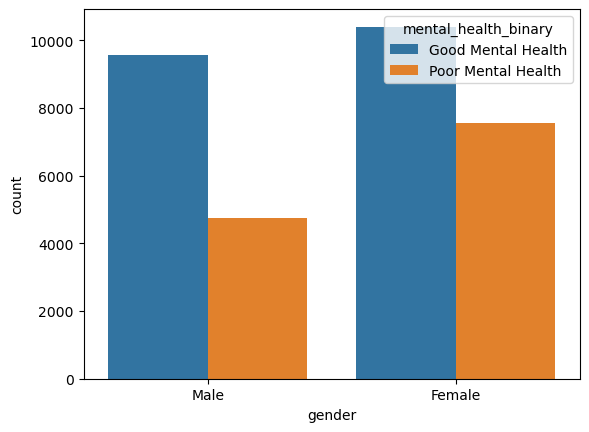

In [444]:
sns.countplot(data=df, x='gender',  hue='mental_health_binary')
df.groupby('gender')['mental_health_binary'].value_counts(normalize='true').round(2).reset_index()


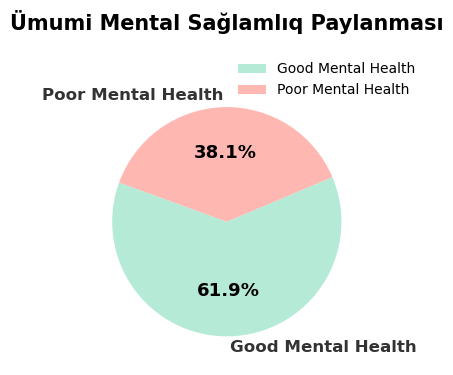

In [448]:

# Payların hesablanması
mh_counts = df['mental_health_binary'].value_counts(normalize=True) * 100

# Rənglər
colors = ['#B5EAD7', '#FFB7B2']  # Good = yaşıl ton, Poor = çəhrayı ton

# Pie chart
fig, ax = plt.subplots(figsize=(4, 4))
wedges, texts, autotexts = ax.pie(
    mh_counts,
    labels=mh_counts.index,
    autopct='%1.1f%%',
    startangle=160,
    colors=colors,
    textprops={'fontsize': 12, 'color': '#333', 'weight': 'bold'}
)

# Yüzdələrin dizaynı
plt.setp(autotexts, size=13, weight='bold', color='black')

# Başlıq (yuxarıda, pie ilə təmas yoxdur)
plt.title('Ümumi Mental Sağlamlıq Paylanması', fontsize=15, weight='bold', pad=35)

# Legend (yuxarı sağ küncdə, başlıqsız)
ax.legend(
    wedges, mh_counts.index,
    loc='upper right',
    bbox_to_anchor=(1.2, 1.1),
    fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


In [450]:
#Insight: Umumi datanin 61.9% Good, 38.1% Poor Mental health teskil edir. Bu 38%-in ekseriyyetini ise qadinlar teskil edir.
#Yeni qrafikden de gorduyumuz 23.4 %-i.
#Bele ki, bizim datada 17 935 qadin, 14 314 kisi var. Qadinlarin teqriben 42 %-i zeif mental healha sahibdir. Kisilerde ise
# bu gosterici 33 % teskil edir.

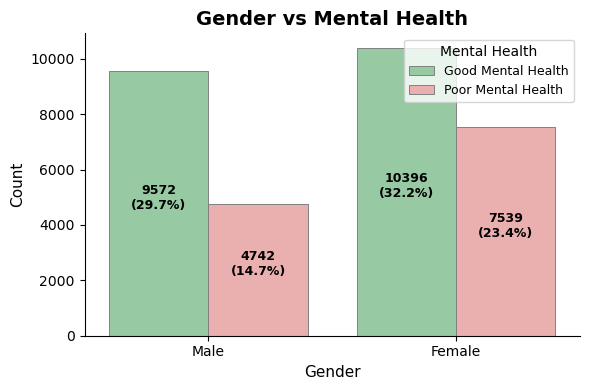

In [452]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

pastel_palette = {
    "Good Mental Health": "#8fd19e",  
    "Poor Mental Health": "#f4a6a6"  
}

ax = sns.countplot(
    data=df,
    x="gender",
    hue="mental_health_binary",
    palette=pastel_palette,
    edgecolor="gray",
    linewidth=0.7
)
for container in ax.containers:
    labels = [f"{int(v)}\n({v/len(df)*100:.1f}%)" for v in container.datavalues]
    ax.bar_label(
        container,
        labels=labels,
        label_type="center",    
        fontsize=9,
        padding=4,
        color="black",
        weight="bold"
    )
plt.title("Gender vs Mental Health", fontsize=14, weight="bold")
plt.ylabel("Count", fontsize=11)
plt.xlabel("Gender", fontsize=11)
plt.legend(title="Mental Health", frameon=True, fontsize=9, title_fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()


In [466]:
target_col='mental_health_binary'
bins = [18, 30, 50, 65, 100]
labels = ['18-30 (Gənc Yetkin)', '31-50 (Orta Yaş)', '51-65 (Yaşlı)', '66+ (Təqaüdçü)']
df['age_binned'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df_result_age = df.groupby(['gender', 'age_binned'])[target_col] \
                  .value_counts(normalize=True) \
                  .mul(100) \
                  .rename('Poor Mental Health (%)') \
                  .reset_index()

# 2. Yalnız "Poor Mental Health" nəticələrini saxlamaq
df_poor_age_only = df_result_age[df_result_age[target_col] == 'Poor Mental Health']
    
# 3. Bütün nəticələri çap edək
print("\n--- Poor Mental Health Riski (Yaş Qruplarına Görə) ---")
df_poor_age_only.sort_values(by=['age_binned', 'gender'], ascending=[True, True]).reset_index(drop='true')




--- Poor Mental Health Riski (Yaş Qruplarına Görə) ---


,gender,age_binned,mental_health_binary,Poor Mental Health (%)
0,Female,18-30 (Gənc Yetkin),Poor Mental Health,48.397669
1,Male,18-30 (Gənc Yetkin),Poor Mental Health,38.266979
2,Female,31-50 (Orta Yaş),Poor Mental Health,44.107977
3,Male,31-50 (Orta Yaş),Poor Mental Health,37.082762
4,Female,51-65 (Yaşlı),Poor Mental Health,42.731092
5,Male,51-65 (Yaşlı),Poor Mental Health,33.705821
6,Female,66+ (Təqaüdçü),Poor Mental Health,33.229217
7,Male,66+ (Təqaüdçü),Poor Mental Health,24.929736


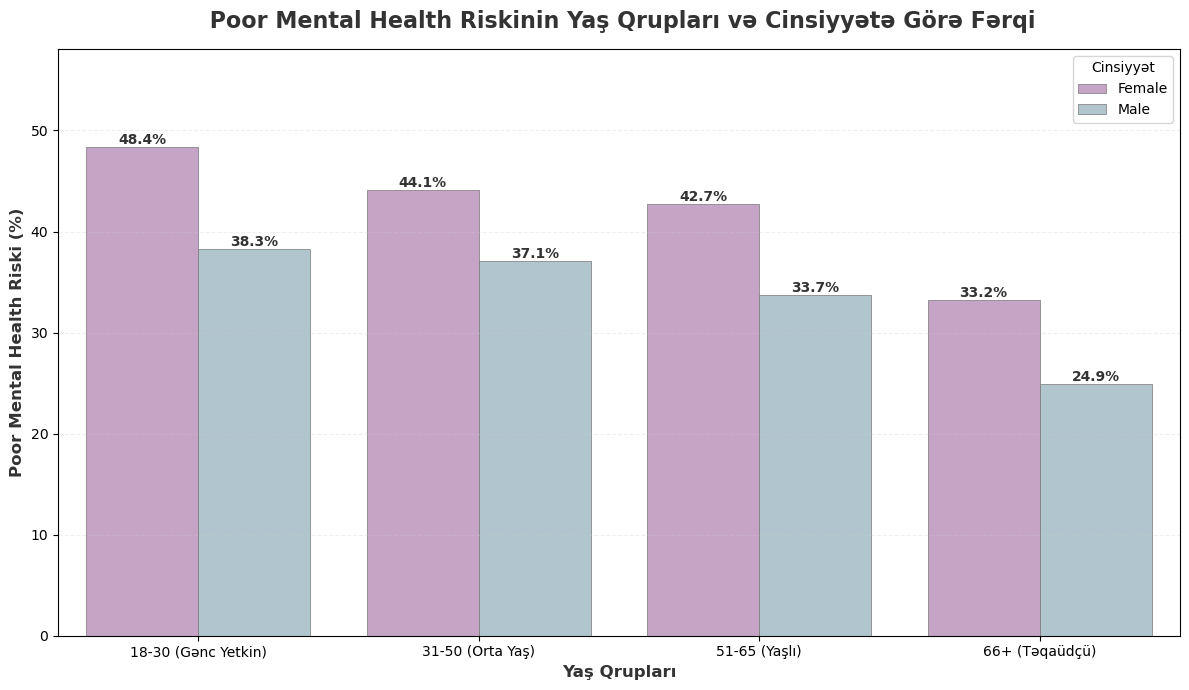

In [468]:
palette_pastel = {'Female': '#C8A2C8', 'Male': '#AEC6CF'} 
text_color = '#333333' 

plt.figure(figsize=(12, 7))

# Barplot
ax = sns.barplot(
    data=df_poor_age_only, 
    x='age_binned', 
    y='Poor Mental Health (%)', 
    hue='gender', 
    palette=palette_pastel, 
    edgecolor='#777777', 
    linewidth=0.5,
    saturation=0.9 
)

# Faizin Bar-ların üzərində göstərilməsi
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=10, weight='bold', color=text_color)

# Başlıqlar və Etiketlər
plt.title(
    ' Poor Mental Health Riskinin Yaş Qrupları və Cinsiyyətə Görə Fərqi', 
    fontsize=16, 
    weight='bold', 
    pad=15,
    color=text_color
)
plt.xlabel('Yaş Qrupları', fontsize=12, weight='bold', color=text_color)
plt.ylabel('Poor Mental Health Riski (%)', fontsize=12, weight='bold', color=text_color)
plt.ylim(0, df_poor_age_only['Poor Mental Health (%)'].max() * 1.2)
plt.legend(title='Cinsiyyət', fontsize=10)
plt.grid(axis='y', alpha=0.3, linestyle='--', color='#CCCCCC') # Yüngül tor xətləri
plt.tight_layout()
plt.show()



In [ ]:
# Hər iki cinsdə də yaş artdıqca (xüsusilə 66+ qrupunda) risk faizi kəskin azalır. 
# Bu, yaşlı insanların (təqaüdçülərin) həyat sabitliyi, bəlkə də daha az iş təzyiqi 
# səbəbindən daha dayanıqlı olduğunu göstərə bilər.

In [470]:
df.groupby('gender')['loneliness_frequency'].value_counts(normalize='true').reset_index()

,gender,loneliness_frequency,proportion
0,Female,Hardly ever/never,0.598941
1,Female,Some of the time,0.312573
2,Female,Often,0.088486
3,Male,Hardly ever/never,0.686111
4,Male,Some of the time,0.248498
5,Male,Often,0.065391


In [472]:
df_result = df.groupby(['gender', 'loneliness_frequency'])[target_col] \
              .value_counts(normalize=True) \
              .mul(100) \
              .rename('Poor Mental Health (%)') \
              .reset_index()

# Yalnız Poor Mental Health nəticələrini saxlayaq
df_poor_only = df_result[df_result[target_col] == 'Poor Mental Health'].loc[:,['gender','loneliness_frequency','Poor Mental Health (%)']]
df_poor_only.sort_values(by='Poor Mental Health (%)', ascending=False).reset_index(drop='true')

,gender,loneliness_frequency,Poor Mental Health (%)
0,Female,Often,85.948330
1,Male,Often,80.769231
2,Female,Some of the time,60.702818
3,Male,Some of the time,54.596570
4,Female,Hardly ever/never,25.805250
5,Male,Hardly ever/never,20.812545


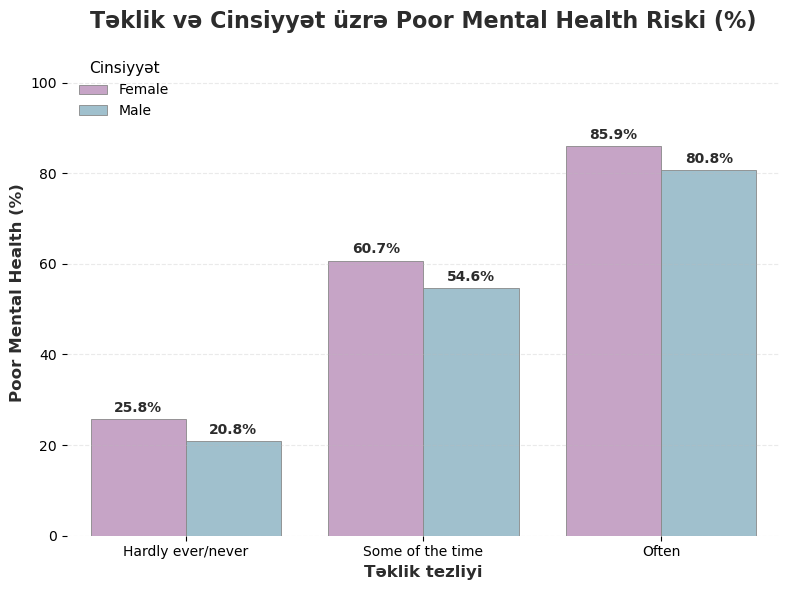

In [474]:
palette_pastel = {
    'Female': '#C8A2C8',  # pastel bənövşəyi
    'Male': '#9EC1CF'     # pastel mavi
}
text_color = '#2C2C2C'

# Təklik kateqoriyalarını düzgün ardıcıllıqla göstərmək
order = ['Hardly ever/never', 'Some of the time', 'Often']
df_poor_only['loneliness_frequency'] = pd.Categorical(
    df_poor_only['loneliness_frequency'], categories=order, ordered=True
)

# Barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=df_poor_only,
    x='loneliness_frequency',
    y='Poor Mental Health (%)',
    hue='gender',
    palette=palette_pastel,
    edgecolor='#888888',
    linewidth=0.6,
    saturation=0.9
)

# Faizləri barların üzərinə yazmaq
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=10, weight='bold', color=text_color, padding=3)

# Başlıqlar və ox adları
plt.title(
    'Təklik və Cinsiyyət üzrə Poor Mental Health Riski (%)',
    fontsize=16, weight='bold', color=text_color, pad=15
)
plt.xlabel('Təklik tezliyi', fontsize=12, weight='bold', color=text_color)
plt.ylabel('Poor Mental Health (%)', fontsize=12, weight='bold', color=text_color)

# Vizual tənzimləmələr
plt.ylim(0, df_poor_only['Poor Mental Health (%)'].max() * 1.25)
plt.legend(title='Cinsiyyət', title_fontsize=11, fontsize=10, frameon=False, loc='upper left')
plt.grid(axis='y', alpha=0.3, linestyle='--', color='#BBBBBB')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


,gender,current_financial_situation_binned,proportion
0,Female,Comfortable,0.706551
1,Female,Moderate,0.215110
2,Female,Struggling,0.078338
3,Male,Comfortable,0.730054
4,Male,Moderate,0.197918
5,Male,Struggling,0.072027


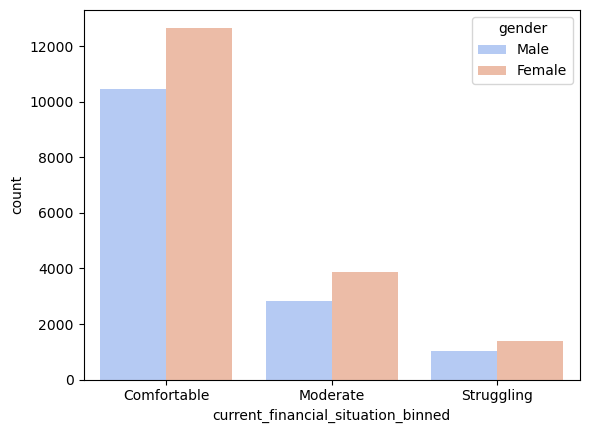

In [476]:
sns.countplot(data=df, x='current_financial_situation_binned', hue='gender', palette='coolwarm')
df.groupby('gender')['current_financial_situation_binned'].value_counts(normalize='true').reset_index()

In [486]:
df_result_fin = df.groupby(['gender', 'current_financial_situation_binned'])[target_col] \
                  .value_counts(normalize=True) \
                  .mul(100) \
                  .rename('Poor Mental Health (%)') \
                  .reset_index()

# Yalnız Poor Mental Health nəticələrini saxlayaq
df_poor_fin_only = df_result_fin[df_result_fin[target_col] == 'Poor Mental Health']
df_poor_fin_only.sort_values(by='Poor Mental Health (%)', ascending=False).reset_index(drop='true')

,gender,current_financial_situation_binned,mental_health_binary,Poor Mental Health (%)
0,Female,Struggling,Poor Mental Health,72.170819
1,Male,Struggling,Poor Mental Health,66.440349
2,Female,Moderate,Poor Mental Health,54.639710
3,Male,Moderate,Poor Mental Health,46.593717
4,Female,Comfortable,Poor Mental Health,34.856376
5,Male,Comfortable,Poor Mental Health,26.191388


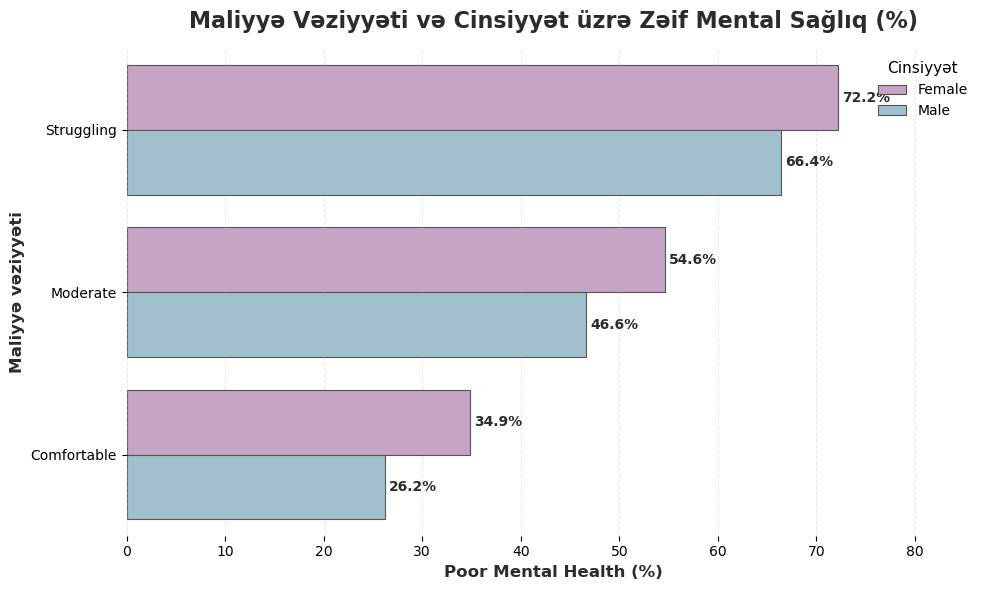

In [488]:

palette_pastel = {
    'Female': '#C8A2C8',  # pastel bənövşəyi
    'Male': '#9EC1CF'     # pastel mavi
}
text_color = '#2C2C2C'

# Yeni copy dataframe
df_plot = df_poor_fin_only.copy()

# Maliyyə kateqoriyalarını ardıcıllıqla göstərmək
order = ['Struggling', 'Moderate', 'Comfortable']
df_plot['current_financial_situation_binned'] = pd.Categorical(
    df_plot['current_financial_situation_binned'], categories=order, ordered=True
)

# Horizontal barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_plot,
    y='current_financial_situation_binned',
    x='Poor Mental Health (%)',
    hue='gender',
    palette=palette_pastel,
    edgecolor='#555555',
    linewidth=0.8,
    saturation=0.9
)

# Faizləri barların üzərinə yazmaq
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=10, weight='bold', color=text_color, padding=3)

# Başlıqlar və ox adları
plt.title(
    'Maliyyə Vəziyyəti və Cinsiyyət üzrə Zəif Mental Sağlıq (%)',
    fontsize=16, weight='bold', color=text_color, pad=15
)
plt.xlabel('Poor Mental Health (%)', fontsize=12, weight='bold', color=text_color)
plt.ylabel('Maliyyə vəziyyəti', fontsize=12, weight='bold', color=text_color)

# Vizual tənzimləmələr
plt.xlim(0, df_plot['Poor Mental Health (%)'].max() * 1.2)
plt.legend(title='Cinsiyyət', title_fontsize=11, fontsize=10, frameon=False, loc='upper right')
plt.grid(axis='x', alpha=0.3, linestyle='--', color='#BBBBBB')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


In [490]:
df.groupby('gender')['employment_status_binned'].value_counts(normalize='true').reset_index()

,gender,employment_status_binned,proportion
0,Female,Employed,0.533538
1,Female,Retired/Elderly,0.251018
2,Female,Home/Family,0.077223
3,Female,Student/Apprentice,0.061333
4,Female,Unemployed/Other,0.043212
5,Female,Sick/Disabled,0.033677
6,Male,Employed,0.602277
7,Male,Retired/Elderly,0.256043
8,Male,Student/Apprentice,0.060151
9,Male,Unemployed/Other,0.045550


In [496]:
# Məşğulluq və Cinsiyyət üzrə Poor Mental Health nisbəti
df_result_emp = df.groupby(['gender', 'employment_status_binned'])[target_col] \
                  .value_counts(normalize=True) \
                  .mul(100) \
                  .rename('Poor Mental Health (%)') \
                  .reset_index()
# Ardıcıl gender sırası
df_poor_emp_only = df_result_emp[df_result_emp[target_col] == 'Poor Mental Health'].copy()

df_poor_emp_only['gender'] = pd.Categorical(df_poor_emp_only['gender'], categories=['Female', 'Male'], ordered=True)

# İş statuslarını da müəyyən ardıcıllıqla düzürük
emp_order = ['Employed', 'Home/Family', 'Retired/Elderly', 'Sick/Disabled', 'Student/Apprentice', 'Unemployed/Other']
df_poor_emp_only['employment_status_binned'] = pd.Categorical(df_poor_emp_only['employment_status_binned'], categories=emp_order, ordered=True)

# Hər employment status üçün Female → Male ardıcıllığı
df_poor_emp_only = df_poor_emp_only.sort_values(by=['employment_status_binned', 'gender']).reset_index(drop=True)

df_poor_emp_only



,gender,employment_status_binned,mental_health_binary,Poor Mental Health (%)
0,Female,Employed,Poor Mental Health,40.735709
1,Male,Employed,Poor Mental Health,32.096045
2,Female,Home/Family,Poor Mental Health,46.353791
3,Male,Home/Family,Poor Mental Health,50.000000
4,Female,Retired/Elderly,Poor Mental Health,33.696135
5,Male,Retired/Elderly,Poor Mental Health,25.839018
6,Female,Sick/Disabled,Poor Mental Health,82.947020
7,Male,Sick/Disabled,Poor Mental Health,77.958237
8,Female,Student/Apprentice,Poor Mental Health,48.727273
9,Male,Student/Apprentice,Poor Mental Health,33.101045


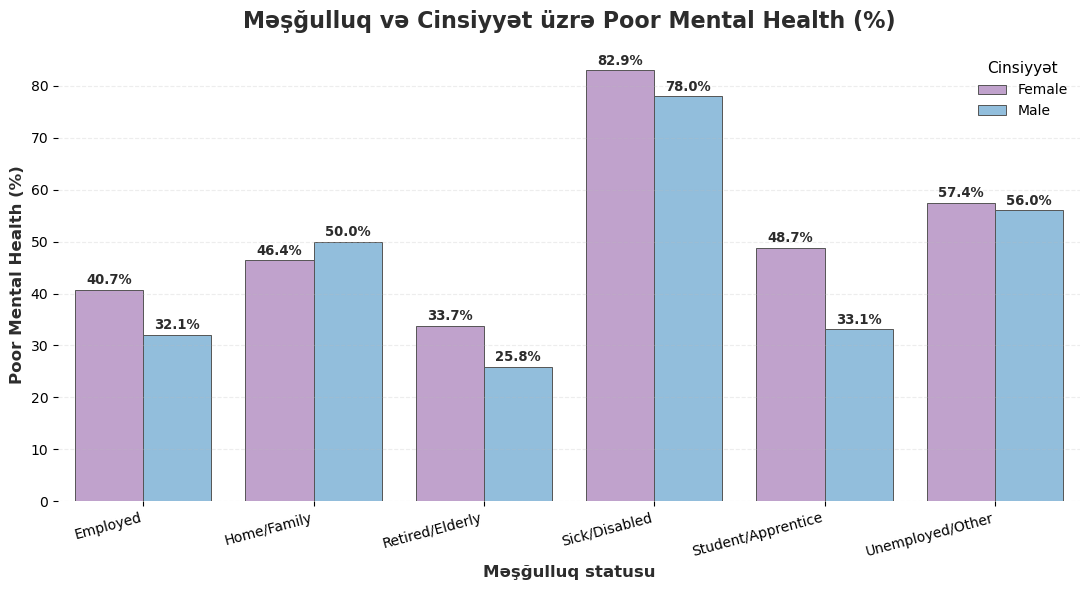

In [498]:
palette_pastel = {
    'Female': '#C39BD3',  
    'Male': '#85C1E9'   
}
text_color = '#2C2C2C'

plt.figure(figsize=(11, 6))
ax = sns.barplot(
    data=df_poor_emp_only,
    x='employment_status_binned',
    y='Poor Mental Health (%)',
    hue='gender',
    palette=palette_pastel,
    edgecolor='#555',
    linewidth=0.7
)

# Annotasiya (faiz dəyərləri)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=9.5, weight='bold', color=text_color, padding=2)

# Başlıqlar və dizayn
plt.title('Məşğulluq və Cinsiyyət üzrə Poor Mental Health (%)', fontsize=16, weight='bold', color=text_color, pad=15)
plt.xlabel('Məşğulluq statusu', fontsize=12, weight='bold', color=text_color)
plt.ylabel('Poor Mental Health (%)', fontsize=12, weight='bold', color=text_color)

plt.xticks(rotation=15, ha='right', fontsize=10)
plt.legend(title='Cinsiyyət', title_fontsize=11, fontsize=10, frameon=False, loc='upper right')
plt.grid(axis='y', alpha=0.25, linestyle='--', color='#BBBBBB')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


In [3914]:
# Analiz nəticəsində görünür ki, xəstə və ya işsiz fərdlər arasında poor mental health faizi ən yüksəkdir.
# Cinsiyyət fərqləri bütün məşğulluq qruplarında davam edir, qadınlarda risk səviyyəsi mütəmadi olaraq daha yüksəkdir
# amma “Home/Family” kateqoriyasında fərq azalıb. Home/Family qrupunda kişilərdə (50%) qadınlardan (46.3%) bir qədər 
# yüksəkdir— bu nadir hallardan biridir. Bu, evdə olan kişilərdə sosial təcrid və mənəvi təzyiq hissinin daha çox olması
# ilə əlaqələndirilə bilər. (Yəni "işləməyən kişi" rolu bəzi mədəniyyətlərdə daha ağır sosial yük daşıyır.)
# Təqaüddə olan və işləyən fərdlər isə ən sabit psixoloji vəziyyətə malik qrup kimi görünürlər

In [500]:
# 1. Aktivlik günlərini qruplaşdırıb, cinsiyyət daxilində target nisbətini tapmaq
df_result_act = df.groupby(['gender', 'moderate_days_per_week'])[target_col] \
                  .value_counts(normalize=True) \
                  .mul(100) \
                  .rename('Poor Mental Health (%)') \
                  .reset_index()

# 2. Yalnız "Poor Mental Health" nəticələrini saxlamaq
df_poor_act_only = df_result_act[df_result_act[target_col] == 'Poor Mental Health']
    
# 3. Bütün nəticələri çap edək (Əvvəlki Məşğulluq Analizi kimi)
df_poor_act_only.reset_index(drop='true')

# Cinsiyyəti sabit ardıcıllığa salaq
df_poor_act_only['gender'] = pd.Categorical(df_poor_act_only['gender'], categories=['Female', 'Male'], ordered=True)

# Günü rəqəm kimi ardıcıl göstərək (0–7)
df_poor_act_only['moderate_days_per_week'] = pd.to_numeric(df_poor_act_only['moderate_days_per_week'], errors='coerce')
df_poor_act_only = df_poor_act_only.sort_values(by=['moderate_days_per_week', 'gender']).reset_index(drop=True)

df_poor_act_only


,gender,moderate_days_per_week,mental_health_binary,Poor Mental Health (%)
0,Female,0,Poor Mental Health,45.345505
1,Male,0,Poor Mental Health,37.802934
2,Female,1,Poor Mental Health,39.479725
3,Male,1,Poor Mental Health,29.650092
4,Female,2,Poor Mental Health,39.357218
5,Male,2,Poor Mental Health,30.653595
6,Female,3,Poor Mental Health,38.487282
7,Male,3,Poor Mental Health,31.058282
8,Female,4,Poor Mental Health,36.251541
9,Male,4,Poor Mental Health,29.898219


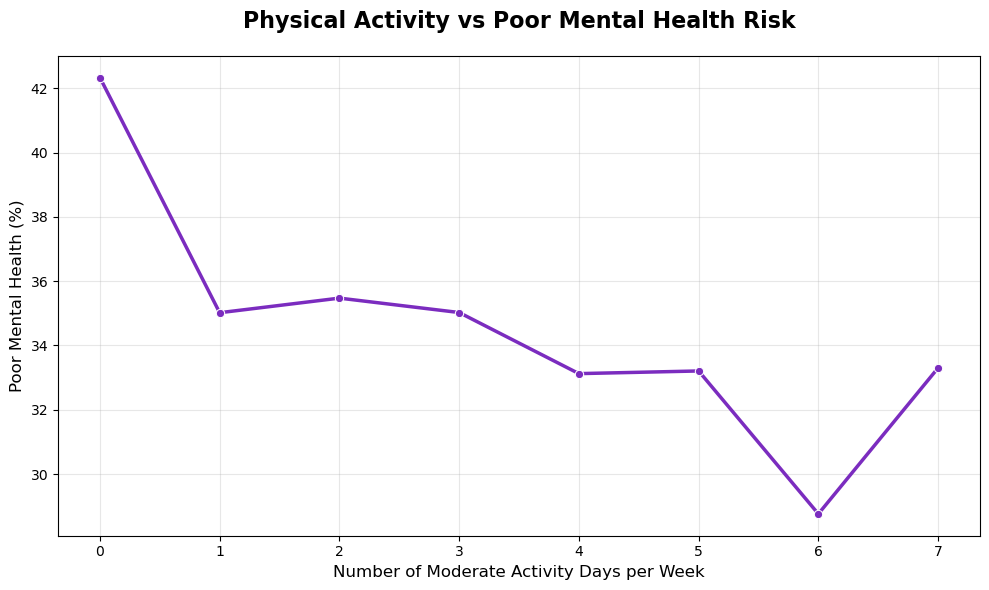

In [502]:
# Sadəcə “Poor Mental Health” faizini tapırıq
activity_risk = (
    df.groupby('moderate_days_per_week')['mental_health_binary']
      .value_counts(normalize=True)
      .mul(100)
      .rename('Poor Mental Health (%)')
      .reset_index()
)

# Yalnız “Poor Mental Health” sətirlərini saxlayiriq
activity_risk = activity_risk[activity_risk['mental_health_binary'] == 'Poor Mental Health']

# --- Vizual ---
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=activity_risk,
    x='moderate_days_per_week',
    y='Poor Mental Health (%)',
    marker='o',
    linewidth=2.5,
    color='#7b2cbf',
)

# Estetik dizayn
plt.title("Physical Activity vs Poor Mental Health Risk", fontsize=16, weight='bold', pad=20)
plt.xlabel("Number of Moderate Activity Days per Week", fontsize=12)
plt.ylabel("Poor Mental Health (%)", fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(range(0, 8))
plt.tight_layout()
plt.show()


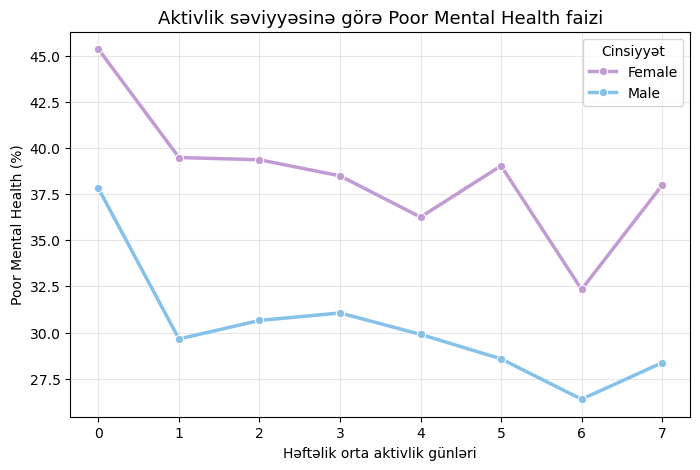

In [504]:
plt.figure(figsize=(8,5))
palette_pastel = {
    'Female': '#C39BD3',  
    'Male': '#85C1E9'   
}
sns.lineplot(
    data=df_poor_act_only,
    x='moderate_days_per_week',
    y='Poor Mental Health (%)',
    hue='gender',
    marker='o',
    linewidth=2.5,
    palette=palette_pastel
)

plt.title('Aktivlik səviyyəsinə görə Poor Mental Health faizi', fontsize=13)
plt.xlabel('Həftəlik orta aktivlik günləri')
plt.ylabel('Poor Mental Health (%)')
plt.grid(alpha=0.3)
plt.legend(title='Cinsiyyət')
plt.show()


In [3922]:
# Həm qadınlarda, həm də kişilərdə fiziki aktivlik artdıqca “Poor Mental Health” faizi azalır.
# Bu, çox aydın və gözlənilən tendensiyadır — fiziki aktivlik stressi azaldır, özünü yaxşı hiss etməyi gücləndirir,
# buna görə də mental sağlamlığa müsbət təsir göstərir.6 gün aktivlikdə risk minimum səviyyəyə enir (yəni optimal balans),
# 7 gün isə yəqin ki, bədən və zehnin artıq dincəlməyə vaxt tapmaması, overtraining effekti və fiziki yüklənmənin yaratdığı
# yorğunluq səbəbindən yenidən artım baş verir.Həm qadınlarda, həm kişilərdə 6 gün orta dərəcəli aktivlik ən aşağı “Poor Mental Health”
# göstəricisinə malikdir. Yəni, bu optimal fiziki fəaliyyət həddi kimi görünür.

In [506]:
target_col = 'mental_health_binary' # Fərz edilən target sütunu adı
    
# 1. Aktivlik günlərini qruplaşdırıb, cinsiyyət daxilində target nisbətini tapmaq
df_result_act = df.groupby(['gender', 'leisure_satisfaction_binned'])[target_col] \
                  .value_counts(normalize=True) \
                  .mul(100) \
                  .rename('Poor Mental Health (%)').round() \
                  .reset_index()

# 2. Yalnız "Poor Mental Health" nəticələrini saxlamaq
df_poor_act_only = df_result_act[df_result_act[target_col] == 'Poor Mental Health']
    
# 3. Bütün nəticələri çap edək (Əvvəlki Məşğulluq Analizi kimi)
df_poor_act_only.reset_index(drop='true')

df_poor_act_only['gender'] = pd.Categorical(
    df_poor_act_only['gender'],
    categories=['Female', 'Male'],
    ordered=True
)

df_poor_act_only['leisure_satisfaction_binned'] = pd.Categorical(
    df_poor_act_only['leisure_satisfaction_binned'],
    categories=['Dissatisfied', 'Neutral', 'Satisfied'],
    ordered=True
)

# Sıralama – əvvəl satisfaction səviyyəsi, sonra gender
df_poor_act_only = df_poor_act_only.sort_values(
    by=['leisure_satisfaction_binned', 'gender']
).reset_index(drop=True)



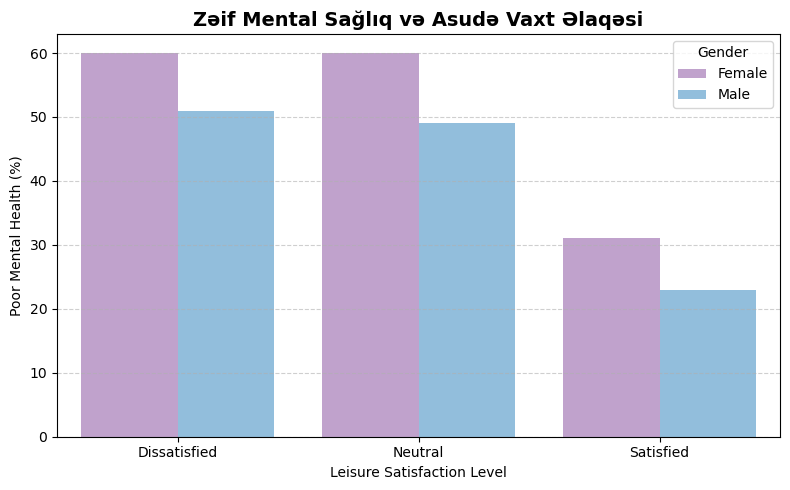

In [508]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_poor_act_only,
    x='leisure_satisfaction_binned',
    y='Poor Mental Health (%)',
    hue='gender',
    palette=['#C39BD3','#85C1E9']
)

plt.title('Zəif Mental Sağlıq və Asudə Vaxt Əlaqəsi', fontsize=14, weight='bold')
plt.xlabel('Leisure Satisfaction Level')
plt.ylabel('Poor Mental Health (%)')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [510]:
# Insight: Leisure satisfaction artdıqca, həm qadınlarda, həm də kişilərdə pis psixoloji vəziyyət riski kəskin azalır.
# Göründüyü kimi, boş vaxtdan razı olmamaq və neytral qalmaq vəziyyəti demək olar ki, dəyişmir – xüsusilə qadınlarda.
# Kişilərdə isə cüzi (təxminən 1%) yaxşılaşma müşahidə olunur.
# Neutral və Dissatisfied qadınlar (təxminən 60%) ən riskli qrup sayılır.
# Lakin boş vaxtından razı olan fərdlərdə risk faizi ciddi şəkildə azalır.


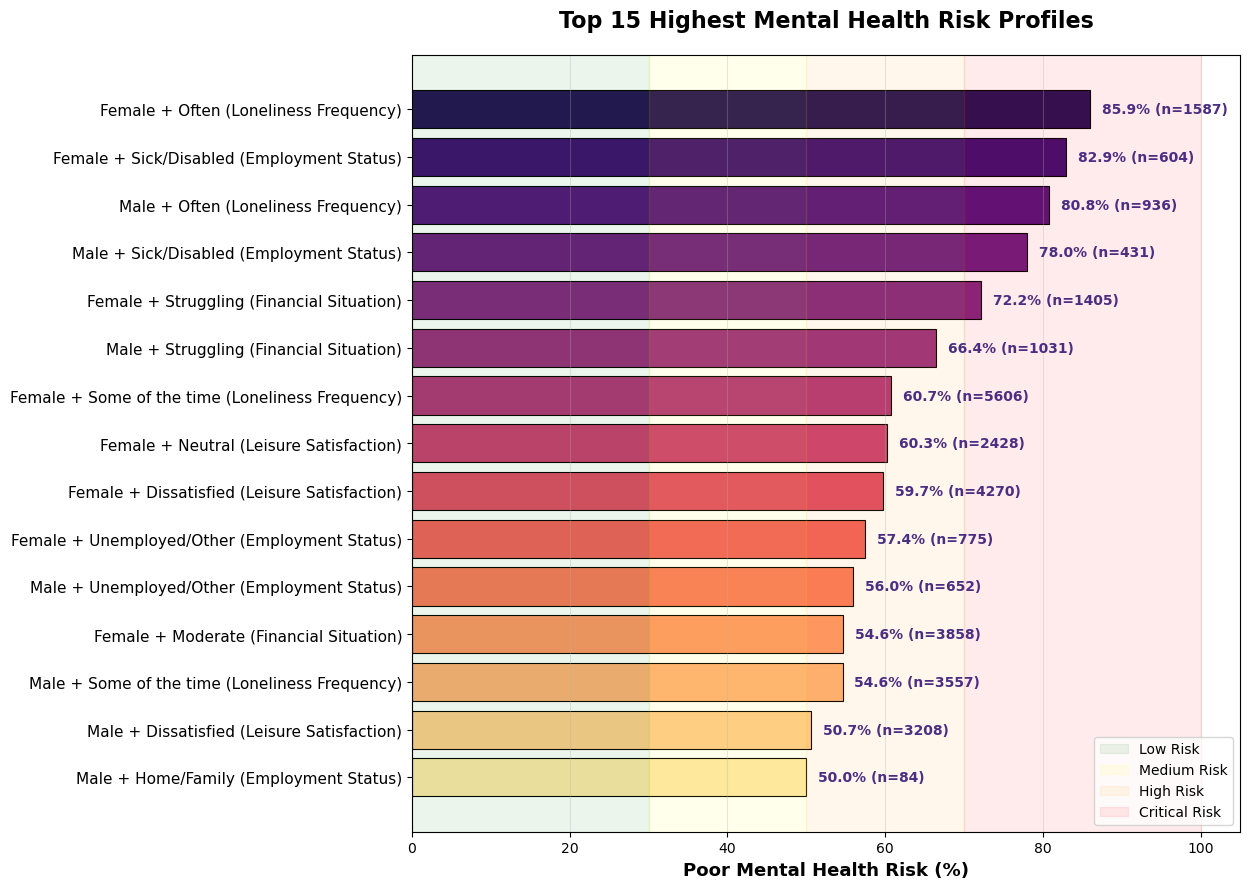

HIGHEST RISK PROFILE: Female + Often (Loneliness Frequency) = 85.9%


In [512]:
risk_profiles = []

# Gender + Loneliness
for gender in df['gender'].unique():
    for lonely in df['loneliness_frequency'].unique():
        subset = df[(df['gender'] == gender) & (df['loneliness_frequency'] == lonely)]
        if len(subset) > 0:
            risk = (subset['mental_health_binary'] == 'Poor Mental Health').mean() * 100
            count = len(subset)
            risk_profiles.append({
                'profile': f"{gender} + {lonely} (Loneliness Frequency)",
                'risk': risk,
                'count': count
            })

# Gender + Financial
for gender in df['gender'].unique():
    for fin in df['current_financial_situation_binned'].unique():
        subset = df[(df['gender'] == gender) & (df['current_financial_situation_binned'] == fin)]
        if len(subset) > 0:
            risk = (subset['mental_health_binary'] == 'Poor Mental Health').mean() * 100
            count = len(subset)
            risk_profiles.append({
                'profile': f"{gender} + {fin} (Financial Situation)",
                'risk': risk,
                'count': count
            })

# Gender + Employment
for gender in df['gender'].unique():
    for emp in df['employment_status_binned'].unique():
        subset = df[(df['gender'] == gender) & (df['employment_status_binned'] == emp)]
        if len(subset) > 0:
            risk = (subset['mental_health_binary'] == 'Poor Mental Health').mean() * 100
            count = len(subset)
            risk_profiles.append({
                'profile': f"{gender} + {emp} (Employment Status)",
                'risk': risk,
                'count': count
            })

# Gender + Leisure
for gender in df['gender'].unique():
    for leisure in df['leisure_satisfaction_binned'].unique():
        subset = df[(df['gender'] == gender) & (df['leisure_satisfaction_binned'] == leisure)]
        if len(subset) > 0:
            risk = (subset['mental_health_binary'] == 'Poor Mental Health').mean() * 100
            count = len(subset)
            risk_profiles.append({
                'profile': f"{gender} + {leisure} (Leisure Satisfaction)",
                'risk': risk,
                'count': count
            })

# Convert to DataFrame and sort
df_risks = pd.DataFrame(risk_profiles)
df_risks = df_risks.sort_values('risk', ascending=False).head(15)

fig, ax = plt.subplots(figsize=(14, 9))

# Professional gradient (magma reversed → açıqdan tünd bənövşəyiyə)
colors = plt.cm.magma(np.linspace(0.15, 0.95, len(df_risks)))

bars = ax.barh(df_risks['profile'], df_risks['risk'], color=colors,
               edgecolor='black', linewidth=0.8)

# Yazıları düz yerləşdirmək üçün:
ax.set_yticks(range(len(df_risks)))
ax.set_yticklabels(df_risks['profile'], fontsize=11, ha='right')

# Faiz və nümunə sayını əlavə edək
for i, (risk, count) in enumerate(zip(df_risks['risk'], df_risks['count'])):
    ax.text(risk + 1.5, i, f'{risk:.1f}% (n={count})',
            va='center', fontsize=10, weight='bold', color='#4B2E83')

# Başlıq və ox etiketləri
ax.set_xlabel('Poor Mental Health Risk (%)', fontsize=13, weight='bold')
ax.set_title('Top 15 Highest Mental Health Risk Profiles',
             fontsize=16, weight='bold', pad=20)
ax.invert_yaxis()  # Yuxarıdan aşağı sıralamaq üçün
ax.grid(axis='x', alpha=0.3)

# RİSK ZONALARI (peşəkar şəffaf arxa plan)
ax.axvspan(0, 30, alpha=0.08, color='green', label='Low Risk')
ax.axvspan(30, 50, alpha=0.08, color='yellow', label='Medium Risk')
ax.axvspan(50, 70, alpha=0.08, color='orange', label='High Risk')
ax.axvspan(70, 100, alpha=0.08, color='red', label='Critical Risk')

ax.legend(loc='lower right', fontsize=10, frameon=True)
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Yazıların toqquşmaması üçün

plt.show()

# Ən riskli profili çap edək
if not df_risks.empty:
    print(f"HIGHEST RISK PROFILE: {df_risks.iloc[0]['profile']} = {df_risks.iloc[0]['risk']:.1f}%")
else:
    print("No data available for risk profiles.")


In [514]:
# TOP 10 Worst Combinations
compound = df.groupby(['gender','loneliness_frequency','current_financial_situation_binned'])\
    ['mental_health_binary'].apply(lambda x: (x == 'Poor Mental Health').mean() * 100)\
    .sort_values(ascending=False).head(10)

print("TOP 10 WORST COMBINATIONS:")
compound.reset_index()

TOP 10 WORST COMBINATIONS:


,gender,loneliness_frequency,current_financial_situation_binned,mental_health_binary
0,Female,Often,Struggling,92.215569
1,Male,Often,Struggling,90.452261
2,Female,Often,Moderate,89.080460
3,Male,Often,Moderate,85.490196
4,Female,Often,Comfortable,80.848153
5,Male,Some of the time,Struggling,80.474934
6,Female,Some of the time,Struggling,79.049296
7,Male,Often,Comfortable,74.273859
8,Female,Some of the time,Moderate,68.340307
9,Male,Some of the time,Moderate,63.210702


In [516]:
target_col = 'mental_health_binary' # Fərz edilən target sütunu adı
    
# 1. Aktivlik günlərini qruplaşdırıb, cinsiyyət daxilində target nisbətini tapmaq
df_result_drink = df.groupby(['gender', 'drinks_per_typical_day'])[target_col] \
                  .value_counts(normalize=True) \
                  .mul(100) \
                  .rename('Poor Mental Health (%)').round() \
                  .reset_index()

# 2. Yalnız "Poor Mental Health" nəticələrini saxlamaq
df_poor_drink_only = df_result_drink[df_result_drink[target_col] == 'Poor Mental Health']
    
# 3. Bütün nəticələri çap edək (Əvvəlki Məşğulluq Analizi kimi)
df_poor_drink_only.reset_index(drop='true')

df_poor_drink_only['gender'] = pd.Categorical(
    df_poor_drink_only['gender'],
    categories=['Female', 'Male'],
    ordered=True
)

df_poor_drink_only['drinks_per_typical_day'] = pd.Categorical(
    df_poor_drink_only['drinks_per_typical_day'],
    categories=['Nondrinker', '1-2 drinks', '3-4 drinks', '5-6 drinks','7-9 drinks','10+ drinks'],
    ordered=True
)

# Sıralama – əvvəl satisfaction səviyyəsi, sonra gender
df_poor_drink_only = df_poor_drink_only.sort_values(
    by=['drinks_per_typical_day', 'gender']
).reset_index(drop=True)

df_poor_drink_only

,gender,drinks_per_typical_day,mental_health_binary,Poor Mental Health (%)
0,Female,Nondrinker,Poor Mental Health,44.0
1,Male,Nondrinker,Poor Mental Health,38.0
2,Female,1-2 drinks,Poor Mental Health,38.0
3,Male,1-2 drinks,Poor Mental Health,30.0
4,Female,3-4 drinks,Poor Mental Health,44.0
5,Male,3-4 drinks,Poor Mental Health,32.0
6,Female,5-6 drinks,Poor Mental Health,48.0
7,Male,5-6 drinks,Poor Mental Health,35.0
8,Female,7-9 drinks,Poor Mental Health,56.0
9,Male,7-9 drinks,Poor Mental Health,43.0


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Nondrinker'),
  Text(1, 0, '1-2 drinks'),
  Text(2, 0, '3-4 drinks'),
  Text(3, 0, '5-6 drinks'),
  Text(4, 0, '7-9 drinks'),
  Text(5, 0, '10+ drinks')])

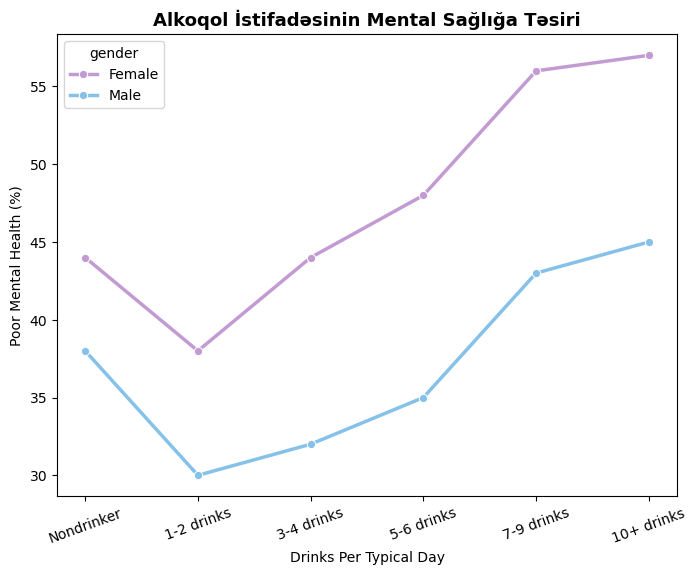

In [518]:
plt.figure(figsize=(8, 6))
sns.lineplot(
    data=df_poor_drink_only,
    x='drinks_per_typical_day',
    y='Poor Mental Health (%)',
    hue='gender',
    marker='o',
    linewidth=2.5,
    palette=['#C39BD3', '#85C1E9']
)
plt.title('Alkoqol İstifadəsinin Mental Sağlığa Təsiri', fontsize=13, weight='bold')
plt.xlabel('Drinks Per Typical Day')
plt.xticks(rotation=20)

In [520]:
# Ən diqqətçəkən nəticə, həm qadınlar, həm də kişilər üçün minimal miqdarda (1-2 drinks) spirtli içki qəbul edənlərin
# "Poor Mental Health" riski non-drinker-lərdən (içki içməyənlərdən) daha aşağıdır.
# Faydalı Insight: Bu, sosial içki içmənin və ya yüngül miqdarın bəzi sosial və ya stressi azaldıcı faydaları 
# ola biləcəyini, nəticədə mental rifahı yaxşılaşdıra biləcəyini göstərir.
# İstehlak miqdarı artdıqca Poor Mental Health riski də artır, lakin bu artım 7-9 içki qrupundan sonra daha kəskinləşir:
# Qadınlar: Risk 38% (1-2 içki) dən başlayaraq 57% -ə qədər (10+ içki) yüksəlir.
# Kişilər: Risk 30% (1-2 içki) dən başlayaraq 45% -ə qədər (10+ içki) yüksəlir.
# Faydalı Insight: Gündə 5 və ya daha çox içki qəbulu risk zonasıdır, lakin 7+ içki müntəzəm olaraq qəbul edildikdə, risk kəskin 
# surətdə 50% baryerini keçir (qadınlarda 57%, kişilərdə 45%).

In [522]:
df_fruit=(df.groupby('fruit_days_per_week')['mental_health_binary'].value_counts(normalize=True) \
          .mul(100)\
          .reset_index())

df_fruit_poor= df_fruit[df_fruit['mental_health_binary'] == 'Poor Mental Health']
df_fruit_poor = df_fruit_poor.rename(columns={'proportion': 'Poor Mental Health (%)'})
df_fruit_poor=df_fruit_poor.sort_values(by='Poor Mental Health (%)')

df_fruit_poor

,fruit_days_per_week,mental_health_binary,Poor Mental Health (%)
5,Every Day,Poor Mental Health,33.581117
3,4-6 Days,Poor Mental Health,37.828492
1,1-3 Days,Poor Mental Health,42.399087
7,Never,Poor Mental Health,46.206601


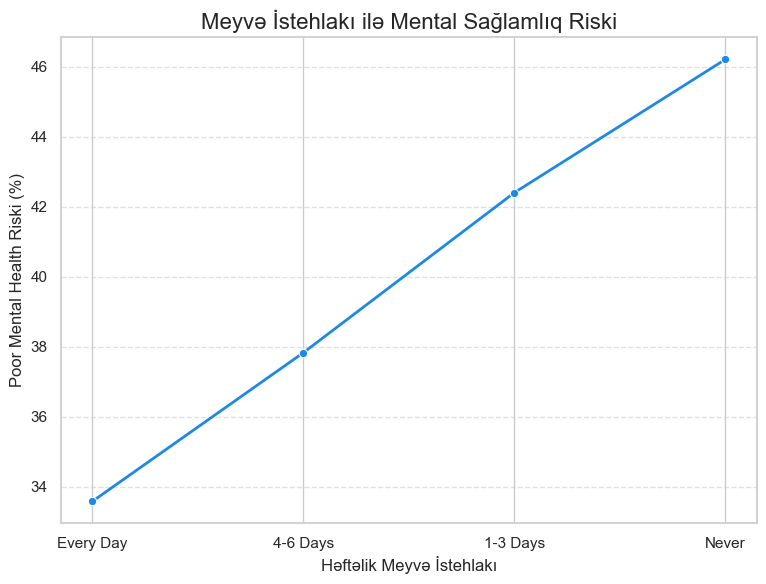

In [3952]:
plt.figure(figsize=(8, 6))

sns.lineplot(
    x='fruit_days_per_week',
    y='Poor Mental Health (%)',
    data=df_fruit_poor,
    marker='o', 
    color='#1E88E5', 
    linewidth=2
)

plt.title('Meyvə İstehlakı ilə Mental Sağlamlıq Riski', fontsize=16)
plt.xlabel('Həftəlik Meyvə İstehlakı', fontsize=12)
plt.ylabel('Poor Mental Health Riski (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# Nəticə: Bu tapıntı, mütəmadi meyvə istehlakının mental rifahın qorunmasında potensial qoruyucu rol oynadığını göstərir
# və sağlam qidalanma təşviqinin əhəmiyyətini vurğulayır.

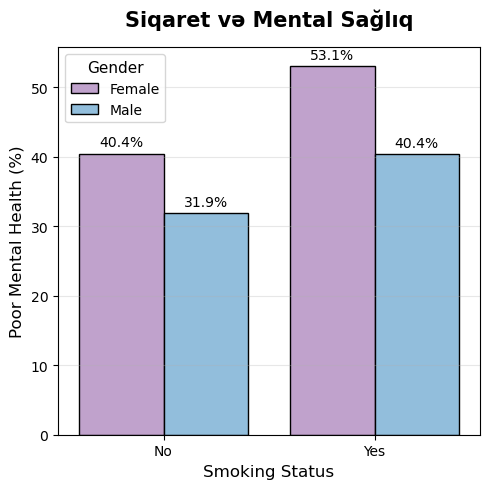

In [524]:
df_poor_smoke = (
    df.groupby(['gender','smoking_status'])['mental_health_binary']
    .value_counts(normalize=True)
    .mul(100)
    .rename('Poor Mental Health (%)')
    .reset_index()
)

df_poor_smoke = df_poor_smoke[df_poor_smoke['mental_health_binary'] == 'Poor Mental Health']

# Kategoriyaları sıraya qoyaq (əgər varsa)
df_poor_smoke['smoking_status'] = pd.Categorical(
    df_poor_smoke['smoking_status'],
    categories=['No', 'Yes'],
    ordered=True
)

# ====== 2. Qrafik ======
plt.figure(figsize=(5, 5))
sns.barplot(
    data=df_poor_smoke,
    x='smoking_status',
    y='Poor Mental Health (%)',
    hue='gender',
    palette=['#C39BD3', '#85C1E9']  , 
    edgecolor='black'
)

for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10, padding=3)

plt.title('Siqaret və Mental Sağlıq', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Smoking Status', fontsize=12)
plt.ylabel('Poor Mental Health (%)', fontsize=12)
plt.legend(title='Gender', fontsize=10, title_fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.show()


In [ ]:
# İnsight: Siqaret çəkənlərdə “Poor Mental Health” göstəricisi həm qadınlarda (≈53%), həm də kişilərdə (≈40%) daha yüksəkdir.
# Siqaret çəkməyənlərdə isə bu nisbət müvafiq olaraq qadınlarda ≈40%, kişilərdə ≈32% civarındadır.
# Bu, siqaret istifadəsinin psixoloji rifaha mənfi təsiri ola biləcəyini göstərir, xüsusilə qadınlar arasında fərq daha kəskindir.

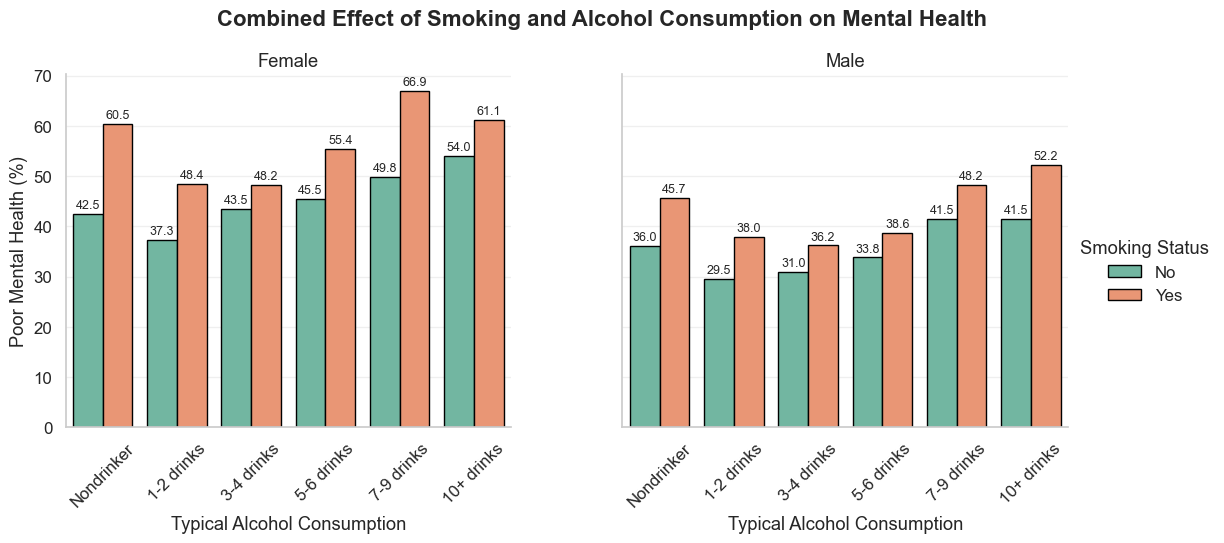

In [526]:
target_col = 'mental_health_binary'

df_drink_smoke = (
    df.groupby(['gender', 'smoking_status', 'drinks_per_typical_day'])[target_col]
      .value_counts(normalize=True)
      .mul(100)
      .rename('Poor Mental Health (%)')
      .reset_index()
)

df_drink_smoke = df_drink_smoke[df_drink_smoke[target_col] == 'Poor Mental Health']

drink_order = ['Nondrinker', '1-2 drinks', '3-4 drinks', '5-6 drinks', '7-9 drinks', '10+ drinks']
df_drink_smoke['drinks_per_typical_day'] = pd.Categorical(
    df_drink_smoke['drinks_per_typical_day'],
    categories=drink_order, ordered=True
)

smoke_order = ['No', 'Yes']
df_drink_smoke['smoking_status'] = pd.Categorical(
    df_drink_smoke['smoking_status'],
    categories=smoke_order, ordered=True
)

sns.set(style="whitegrid", font_scale=1.1)
g = sns.FacetGrid(df_drink_smoke, col='gender', height=5, aspect=1.1)

g.map_dataframe(
    sns.barplot,
    x='drinks_per_typical_day',
    y='Poor Mental Health (%)',
    hue='smoking_status',
    palette='Set2',
    edgecolor='black'
)

g.set_axis_labels("Typical Alcohol Consumption", "Poor Mental Health (%)")
g.add_legend(title="Smoking Status")
g.set_titles(col_template="{col_name}")

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=9, padding=2)
    ax.grid(alpha=0.3, axis='y')
    ax.tick_params(axis='x', rotation=45)

plt.subplots_adjust(top=0.85, wspace=0.25)
g.fig.suptitle("Combined Effect of Smoking and Alcohol Consumption on Mental Health", 
               fontsize=16, fontweight='bold')

plt.show()


In [ ]:
# Siqaretin Gücləndirici Rolu: Hər hansı bir alkoqol səviyyəsində, siqaret çəkənlər ("Yes" barı) siqaret çəkməyənlərə ("No" barı)
# nisbətən ardıcıl olaraq daha yüksək "Poor Mental Health" riski daşıyır. Siqaret çəkmək sadəcə bir risk faktoru deyil,
# digər zərərli vərdişlərin (alkoqolun) neqativ təsirini gücləndirən katalizatordur.

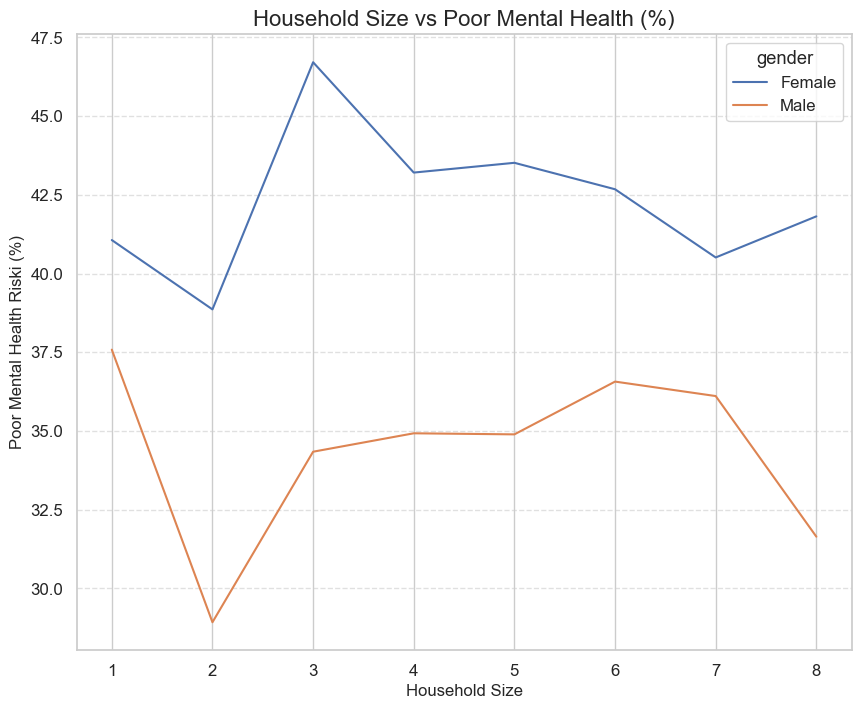

In [528]:
df_house_size=df.groupby(['gender','household_size'])['mental_health_binary'].value_counts(normalize =True).mul(100).rename('Poor Mental Health (%)').reset_index()

df_poor_house_size=df_house_size[df_house_size['mental_health_binary']=='Poor Mental Health']
df_poor_house_size=df_poor_house_size[df_poor_house_size['household_size']<=8]
plt.figure(figsize=(10,8))
sns.lineplot(data=df_poor_house_size, x='household_size', y='Poor Mental Health (%)', hue='gender')
plt.title('Household Size vs Poor Mental Health (%)', fontsize=16)
plt.xlabel('Household Size', fontsize=12)
plt.ylabel('Poor Mental Health Riski (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

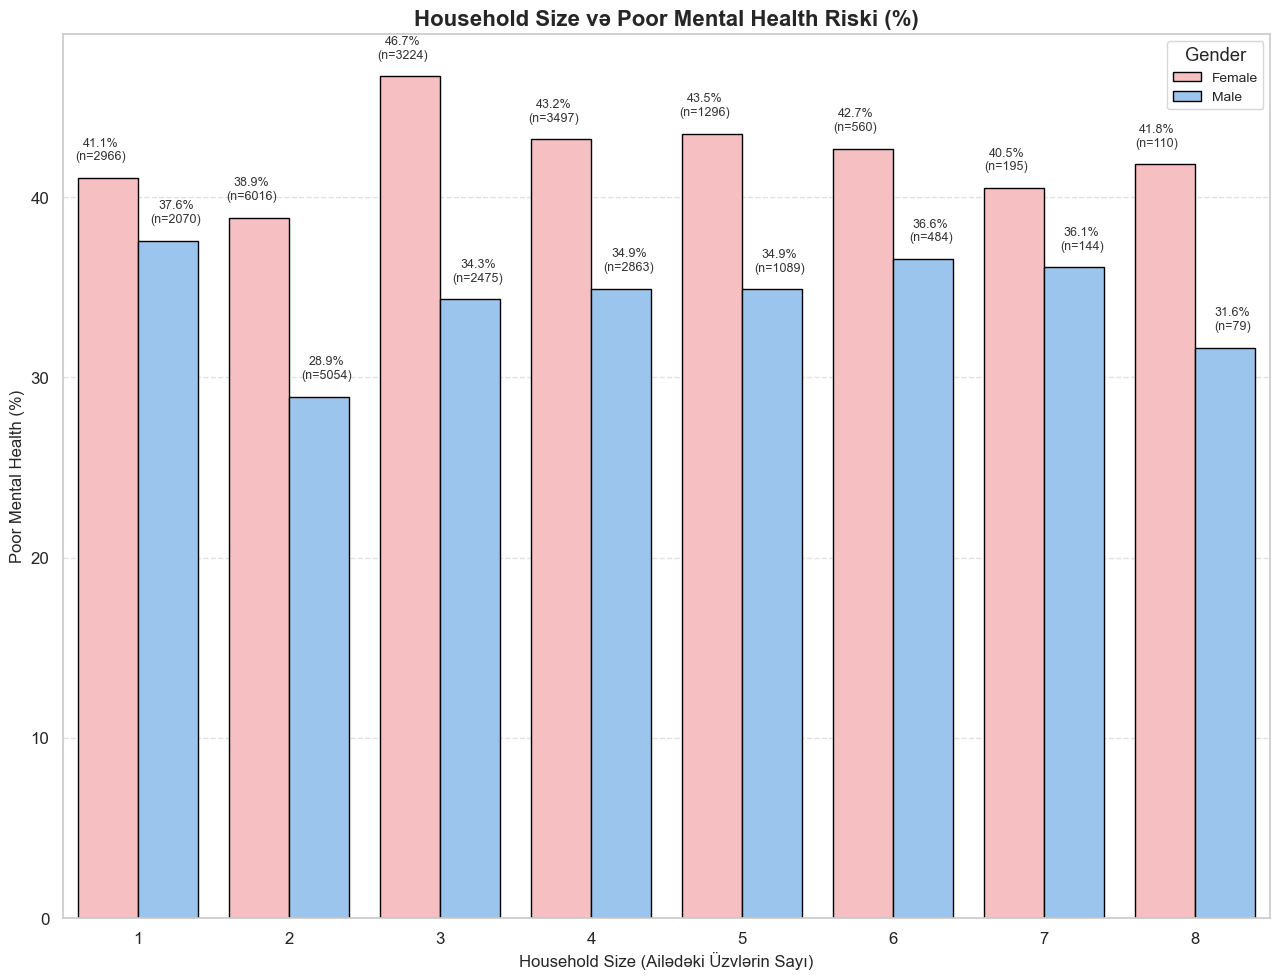

In [530]:

df_house_size = (
    df.groupby(['gender', 'household_size'])['mental_health_binary']
      .value_counts(normalize=True)
      .mul(100)
      .rename('Poor Mental Health (%)')
      .reset_index()
)

# Yalnız "Poor Mental Health" olan hissə
df_poor_house_size = df_house_size[df_house_size['mental_health_binary'] == 'Poor Mental Health']
df_poor_house_size= df_poor_house_size[df_poor_house_size['household_size']<=8]
# N sayını tapmaq üçün əlavə sütun
df_counts = (
    df.groupby(['gender', 'household_size'])['mental_health_binary']
      .count()
      .rename('Count')
      .reset_index()
)

# Merge et ki, hər bar üzərində n göstərək
df_poor_house_size = df_poor_house_size.merge(df_counts, on=['gender', 'household_size'], how='left')

# Plot
plt.figure(figsize=(13, 10))
sns.barplot(
    data=df_poor_house_size,
    x='household_size',
    y='Poor Mental Health (%)',
    hue='gender',
    palette=['#FFB6B9', '#8EC5FC'],  # pastel professional rənglər
    edgecolor='black'
)

# Faiz və n yazıları
for i, row in df_poor_house_size.iterrows():
    plt.text(
        x=row.name % len(df_poor_house_size['household_size'].unique()) - 0.25 + (0.5 if row['gender'] == 'Male' else 0),
        y=row['Poor Mental Health (%)'] + 1,
        s=f"{row['Poor Mental Health (%)']:.1f}%\n(n={row['Count']})",
        ha='center',
        fontsize=9,
        color='#333'
    )

# Stil
plt.title('Household Size və Poor Mental Health Riski (%)', fontsize=16, weight='bold')
plt.xlabel('Household Size (Ailədəki Üzvlərin Sayı)', fontsize=12)
plt.ylabel('Poor Mental Health (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Gender', fontsize=10)
plt.tight_layout()
plt.show()


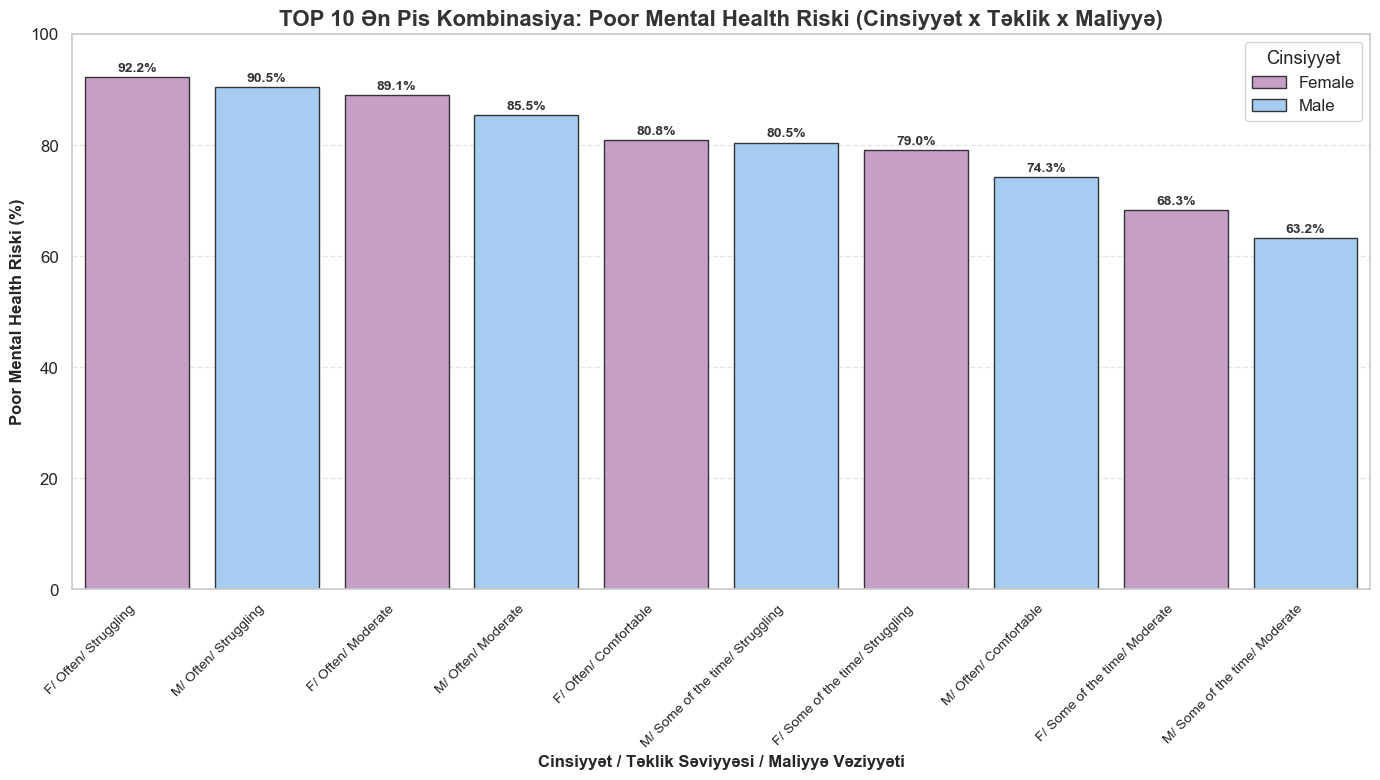


--- Analizin Xülasəsi ---
Vizuallaşdırma, üç əsas risk amilinin (Cinsiyyət, Təklik, Maliyyə) Poor Mental Health riskini necə üst-üstə qoyduğunu və 90%-i aşan kritik hədəf qruplarını aydın şəkildə göstərir.


In [534]:
df_top10 = compound.reset_index(name='Poor Mental Health (%)')
# 1. Vizuallaşdırma üçün X oxu etiketlərinin hazırlanması
# Üç amili (Cinsiyyət/Təklik/Maliyyə) bir etiketdə birləşdiririk
df_top10['label'] = df_top10.apply(
    lambda row: (
        f"{row['gender'][0]}/ "
        f"{row['loneliness_frequency']}/ "
        f"{row['current_financial_situation_binned']}"
    ),
    axis=1
)

# 2. Qrafikin Yaradılması
plt.figure(figsize=(14, 8))

# Cinsiyyəti rənglərlə ayırmaq üçün palitra
palette = {'Female': '#CC99CC', 'Male': '#99CCFF'}

sns.barplot(
    x='label',
    y='Poor Mental Health (%)',
    hue='gender',
    data=df_top10,
    palette=palette,
    dodge=False, # Hər bir etiket üçün bir bar göstəririk
    linewidth=1,
    edgecolor='#333333'
)

# Qrafikə başlıq və etiketlər əlavə edilməsi
plt.title(
    'TOP 10 Ən Pis Kombinasiya: Poor Mental Health Riski (Cinsiyyət x Təklik x Maliyyə)',
    fontsize=16,
    weight='bold',
    color='#333333'
)
plt.ylabel('Poor Mental Health Riski (%)', fontsize=12, weight='bold')
plt.xlabel('Cinsiyyət / Təklik Səviyyəsi / Maliyyə Vəziyyəti', fontsize=12, weight='bold')

# Faizləri bar-ların üzərində göstərmək
for index, row in df_top10.iterrows():
    plt.text(
        index,
        row['Poor Mental Health (%)'] + 1, # Barın üstündə bir az yuxarıda
        f"{row['Poor Mental Health (%)']:.1f}%",
        color='#333333',
        ha="center",
        weight='bold',
        fontsize=10
    )

# Qrafik estetikası
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Cinsiyyət', loc='upper right')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

print("\n--- Analizin Xülasəsi ---")
print("Vizuallaşdırma, üç əsas risk amilinin (Cinsiyyət, Təklik, Maliyyə) Poor Mental Health riskini necə üst-üstə qoyduğunu və 90%-i aşan kritik hədəf qruplarını aydın şəkildə göstərir.")


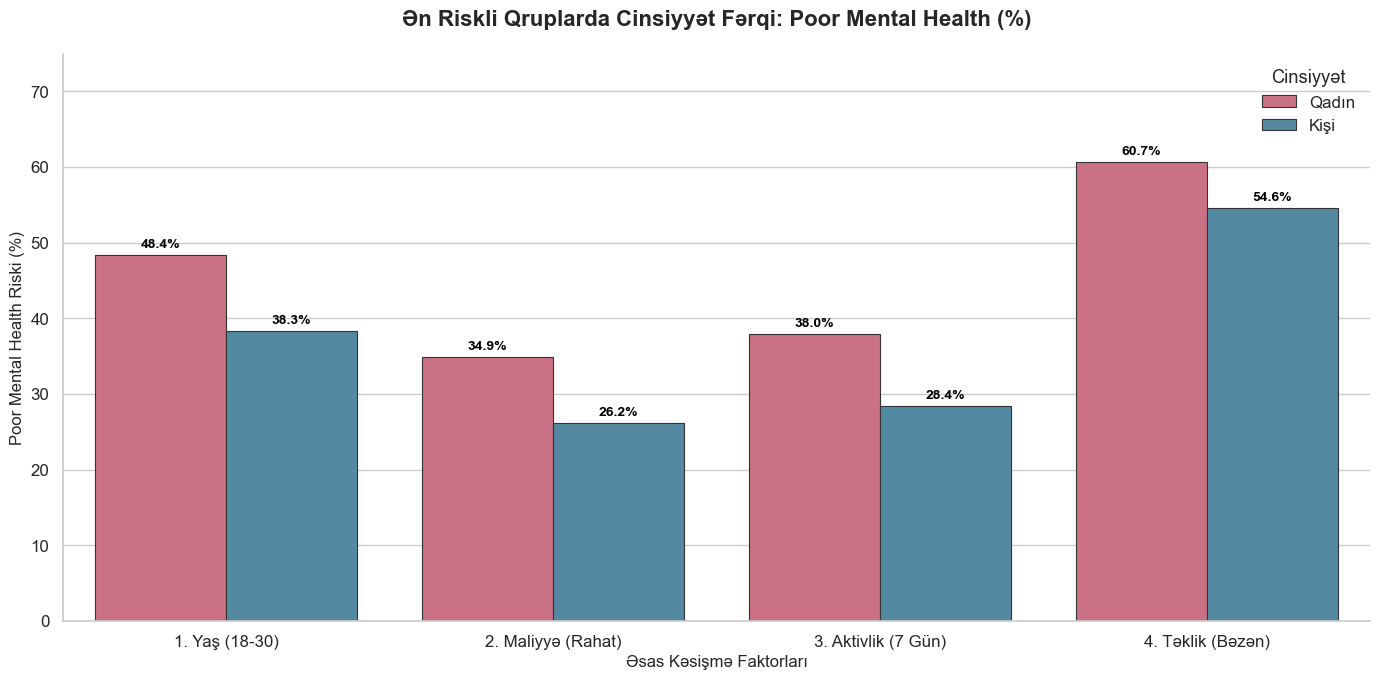

In [536]:

# Qeyd: Bu Data Frame, əvvəlki EDA-larımızdan əldə edilən 4 ən vacib tapıntının
# (Poor Mental Health risk faizlərinin) xülasəsidir. 
# Bu vizualizasiyanın işləməsi üçün bu xüsusi data lazımdır.
data = {
    'Faktor': [
        '1. Yaş (18-30)', '1. Yaş (18-30)', 
        '2. Maliyyə (Rahat)', '2. Maliyyə (Rahat)', 
        '3. Aktivlik (7 Gün)', '3. Aktivlik (7 Gün)', 
        '4. Təklik (Bəzən)', '4. Təklik (Bəzən)'
    ],
    'Cinsiyyət': ['Qadın', 'Kişi'] * 4,
    # Aşağıdakı faizlər sizin dataframe nəticələrinizdən götürülmüşdür
    'Risk_Faizi': [
        48.4, 38.3,  # Yaş 18-30
        34.9, 26.2,  # Maliyyə Rahat
        38.0, 28.4,  # Aktivlik 7 Gün
        60.7, 54.6   # Təklik Bəzən
    ]
}
df_final_insights = pd.DataFrame(data)

# Empathetic Palitra: Qadın (Dərin Çəhrayı), Kişi (Mavi-Boz)
empathetic_palette = {'Qadın': '#DA627D', 'Kişi': '#468FAF'}

# Vizualizasiya
plt.figure(figsize=(14, 7))

ax = sns.barplot(
    data=df_final_insights,
    x='Faktor',
    y='Risk_Faizi',
    hue='Cinsiyyət',
    palette=empathetic_palette,
    edgecolor='#333333',
    linewidth=0.8
)

# Rəngləri sütunların üzərində göstərmək
for container in ax.containers:
    ax.bar_label(
        container, 
        fmt='%.1f%%', 
        label_type='edge', 
        padding=3, 
        fontsize=10, 
        color='black', 
        weight='bold'
    )

# Estetika və Başlıqlar
plt.title(
    'Ən Riskli Qruplarda Cinsiyyət Fərqi: Poor Mental Health (%)', 
    fontsize=16, 
    weight='bold', 
    pad=20
)
plt.ylabel('Poor Mental Health Riski (%)', fontsize=12)
plt.xlabel('Əsas Kəsişmə Faktorları', fontsize=12)
plt.ylim(0, 75) # Daha yaxşı vizual müqayisə üçün yuxarı hədd
plt.legend(title='Cinsiyyət', frameon=False)
plt.xticks(rotation=0) # Faktor adlarını düzgün göstərmək üçün
sns.despine()
plt.tight_layout()
plt.show()


# Predictive Model


--- 1. LIGHTGBM Tuning Başlayır ---
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 15974, number of negative: 15974
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004902 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4881
[LightGBM] [Info] Number of data points in the train set: 31948, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Ən Yaxşı Hyperparametrlər: {'subsample': 1.0, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'num_leaves': 70, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.03, 'colsample_bytree': 0.6}

 LightGBM TƏLİM VƏ TEST NƏTİCƏLƏRİ 
Optimal Hədd (Recall 0.63 üçün): 0.4479

--- Təlim (TRAIN) Nəticələri ---
Train AUC       : 0.8380
Train Gini      : 0.6759
Train Accuracy  : 0.7713
Train

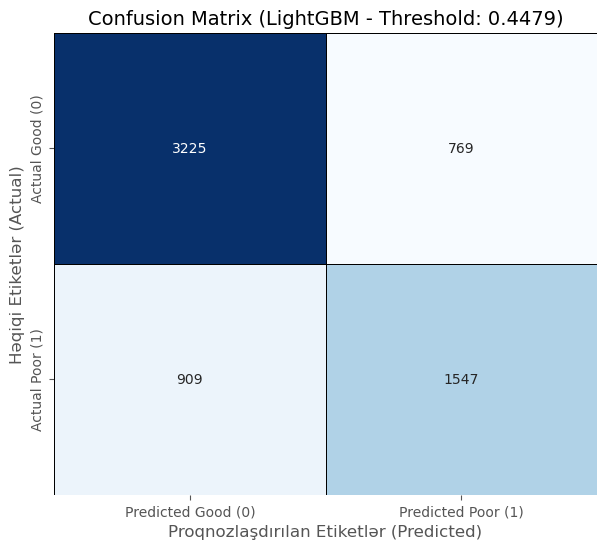


 Qeyd: LightGBM üçün Confusion Matrix göstərildi.


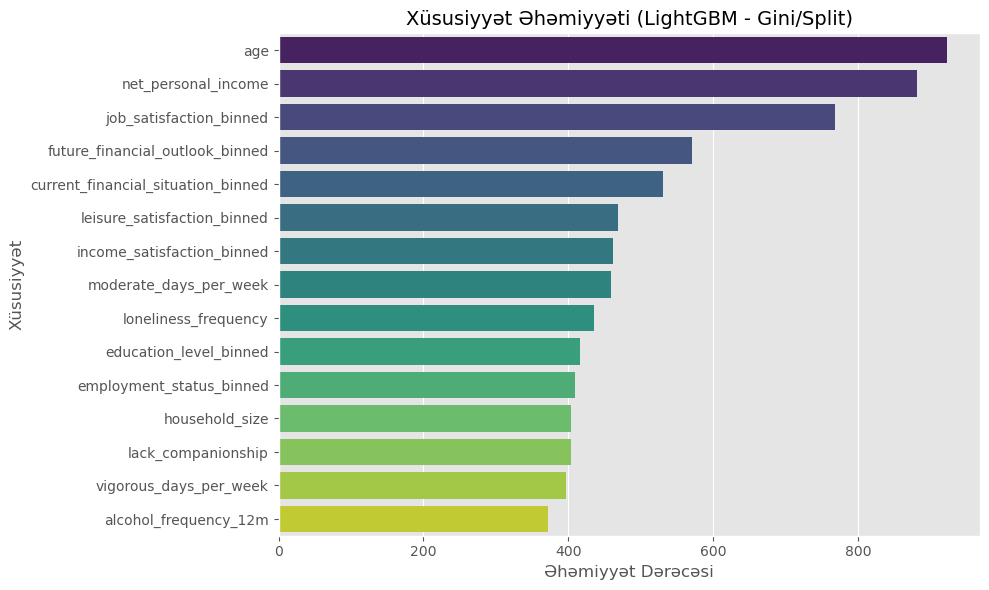


 Qeyd: LightGBM üçün Top 15 Xüsusiyyət Əhəmiyyəti göstərildi.


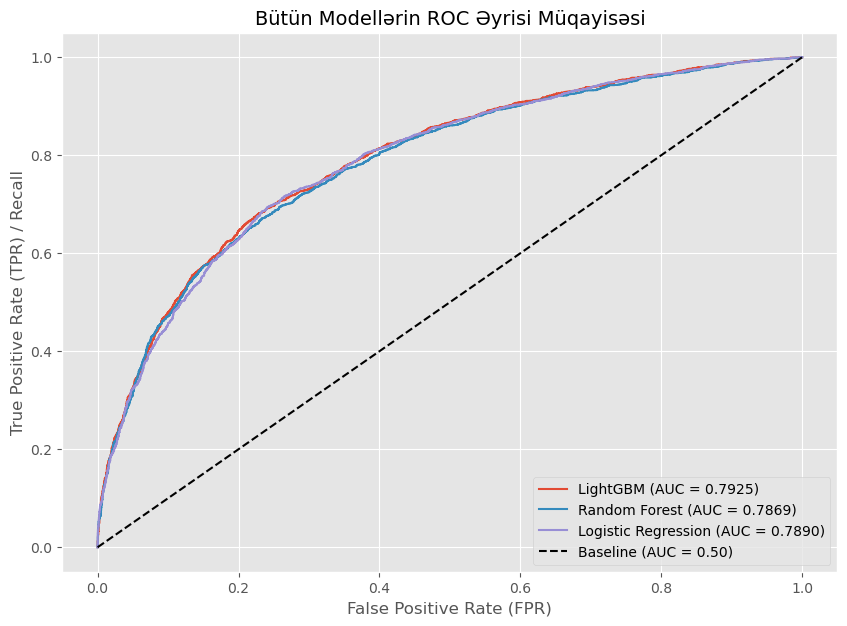



 Qeyd: Bütün modellərin ROC AUC əyrisi müqayisəsi göstərildi.


In [1985]:
### En son 3 model

import pandas as pd
import numpy as np
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
    precision_recall_curve, roc_curve, confusion_matrix # Confusion Matrix əlavə edildi
)
from imblearn.over_sampling import SMOTE
import joblib
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

numeric_features = [
    'net_personal_income', 'age',
    'moderate_days_per_week', 'vigorous_days_per_week',
    'household_size', 'number_of_children'
]
binary_features = ['smoking_status', 'drinks_alcohol_past12m', 'gender']
categorical_features = [
    'lack_companionship','loneliness_frequency','employment_status_binned', 'current_financial_situation_binned',
    'future_financial_outlook_binned', 'marital_status_binned',
    'education_level_binned', 'alcohol_frequency_12m', 
    'drinks_per_typical_day_binned', 'urban_rural', 'country',
    'income_satisfaction_binned', 'leisure_satisfaction_binned', 'job_satisfaction_binned'
]

target_col = 'mental_health_binary'
y = (df[target_col] == 'Poor Mental Health').astype(int)

fruit_mapping = {
    'Never': 0, '1-3 Days': 1, '4-6 Days': 2, 'Every Day': 3,
}

df['fruit_days_per_week'] = df['fruit_days_per_week'].map(fruit_mapping)

all_features = numeric_features + binary_features + categorical_features + ['fruit_days_per_week']

# --- 1. TRAIN/TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    df[all_features], y, test_size=0.2, random_state=42, stratify=y
)

# --- 2. PREPROCESSING ---

def apply_preprocessing(X_train, X_test, y_train):
    """Bütün pre-processing addımları tətbiq edilir: Scaling, Binary Encoding, Target Encoding."""
    # A. Numeric scaling
    scaler = StandardScaler()
    X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
    X_test[numeric_features] = scaler.transform(X_test[numeric_features])
    joblib.dump(scaler, "final_scaler.pkl")

    # B. Binary encoding (0/1)
    for col in binary_features:
        if col == 'gender':
            X_train[col] = (X_train[col] == 'Male').astype(int)
            X_test[col] = (X_test[col] == 'Male').astype(int)
        else:
            X_train[col] = (X_train[col].astype(str).str.lower() == 'yes').astype(int)
            X_test[col] = (X_test[col].astype(str).str.lower() == 'yes').astype(int)

    # C. Mean target encoding for categorical features
    te_maps = {}
    for col in categorical_features:
        train_means = y_train.groupby(X_train[col]).mean()
        global_mean = y_train.mean()
        te_maps[col] = train_means.to_dict()
        
        X_train[col] = X_train[col].map(train_means).fillna(global_mean)
        X_test[col] = X_test[col].map(train_means).fillna(global_mean)
        
    joblib.dump(te_maps, "final_target_encoding_maps.pkl")
    return X_train, X_test

X_train_proc, X_test_proc = apply_preprocessing(X_train.copy(), X_test.copy(), y_train.copy())

# --- 3. SMOTE for oversampling ---
sm = SMOTE(random_state=42, n_jobs=-1)
X_train_res, y_train_res = sm.fit_resample(X_train_proc, y_train)

# --- GLOBAL VARIABLES FOR COMPARISON ---
all_results = {}
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
target_recall = 0.63 # Recall hədəfi

# --- METRICS FUNCTION (YENİLƏNDİ) ---
def evaluate_all_and_store(model_name, best_model, X_train_data, y_train_data, X_test_data, y_test_data):
    """Modeli qiymətləndirir, nəticələri çap edir (Train və Test) və saxlanc üçün formatlayır."""
    
    # 1. Predictions
    y_proba_test = best_model.predict_proba(X_test_data)[:, 1]
    y_proba_train = best_model.predict_proba(X_train_data)[:, 1]

    # 2. Optimal threshold tuning (Test datasına əsaslanaraq)
    precision_curve, recall_curve, thresholds = precision_recall_curve(y_test_data, y_proba_test)
    
    # Optimal threshold'un tapılması: Recall hədəfinə ən yaxın olan.
    optimal_idx = np.argmin(np.abs(recall_curve - target_recall))
    optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5
    
    # 3. Predictions using optimal threshold
    y_pred_test = (y_proba_test >= optimal_threshold).astype(int)
    y_pred_train = (y_proba_train >= optimal_threshold).astype(int)

    # 4. Metric calculation helper
    def get_metrics(y_true, y_pred, y_proba):
        auc = roc_auc_score(y_true, y_proba)
        return {
            'AUC': auc,
            'Gini': 2 * auc - 1,
            'Accuracy': accuracy_score(y_true, y_pred),
            'Precision': precision_score(y_true, y_pred, zero_division=0),
            'Recall': recall_score(y_true, y_pred, zero_division=0),
            'F1 Score': f1_score(y_true, y_pred, zero_division=0),
        }

    train_metrics = get_metrics(y_train_data, y_pred_train, y_proba_train)
    test_metrics = get_metrics(y_test_data, y_pred_test, y_proba_test)

    # 5. Printing
    print(f"\n========================================================")
    print(f" {model_name} TƏLİM VƏ TEST NƏTİCƏLƏRİ ")
    print(f"Optimal Hədd (Recall {target_recall:.2f} üçün): {optimal_threshold:.4f}")
    
    # Print TRAIN metrics
    print("\n--- Təlim (TRAIN) Nəticələri ---")
    print(f"Train AUC       : {train_metrics['AUC']:.4f}")
    print(f"Train Gini      : {train_metrics['Gini']:.4f}")
    print(f"Train Accuracy  : {train_metrics['Accuracy']:.4f}")
    print(f"Train Precision : {train_metrics['Precision']:.4f}")
    print(f"Train Recall    : {train_metrics['Recall']:.4f}")
    print(f"Train F1 Score  : {train_metrics['F1 Score']:.4f}")
    
    # Print TEST metrics
    print("\n--- Test (TEST) Nəticələri ---")
    print(f"Test AUC        : {test_metrics['AUC']:.4f}")
    print(f"Test Gini       : {test_metrics['Gini']:.4f}")
    print(f"Test Accuracy   : {test_metrics['Accuracy']:.4f}")
    print(f"Test Precision  : {test_metrics['Precision']:.4f}")
    print(f"Test Recall     : {test_metrics['Recall']:.4f}")
    print(f"Test F1 Score   : {test_metrics['F1 Score']:.4f}")

    print(f"========================================================")
    
    all_results[model_name] = {
        'model': best_model,
        'auc': test_metrics['AUC'], 
        'y_proba': y_proba_test,
        'y_pred': y_pred_test,
        'optimal_threshold': optimal_threshold 
    }
    return best_model

# A. LIGHTGBM TUNING

print("\n--- 1. LIGHTGBM Tuning Başlayır ---")
lgb_model = lgb.LGBMClassifier(objective='binary', boosting_type='gbdt', random_state=42, n_jobs=-1)

param_dist_lgbm = {
    'num_leaves': [31, 50, 70, 100, 127],
    'max_depth': [6, 8, 10, 12, 15],
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
    'n_estimators': [500, 800, 1000, 1500]
}

random_search_lgbm = RandomizedSearchCV(
    lgb_model, param_distributions=param_dist_lgbm, n_iter=50, scoring='roc_auc', cv=cv, verbose=1, random_state=42, n_jobs=-1
)

random_search_lgbm.fit(
    X_train_res, y_train_res, 
    eval_set=[(X_test_proc, y_test)], 
    eval_metric='auc', 
    callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=False)]
)

best_lgbm = random_search_lgbm.best_estimator_
joblib.dump(best_lgbm, "lgbm_best_model.pkl")

print(f"LightGBM Ən Yaxşı Hyperparametrlər: {random_search_lgbm.best_params_}")
evaluate_all_and_store("LightGBM", best_lgbm, X_train_proc, y_train, X_test_proc, y_test)


# B. RANDOM FOREST TUNING

print("\n--- 2. RANDOM FOREST Tuning Başlayır ---")
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

param_dist_rf = {
    # 'n_estimators': [600, 1000, 1500],
    # 'max_depth': [8, 12, 16],
    # 'min_samples_split': [20, 40, 60],
    # 'min_samples_leaf': [10, 20, 30],
    # 'max_features': ['sqrt', 0.6]
    'n_estimators': [500, 800, 1200], 
    'max_depth': [6, 8, 10, 12],
    'min_samples_split': [30, 50, 70],
    'min_samples_leaf': [20, 30, 40],
    'max_features': ['sqrt', 0.7] 

}

random_search_rf = RandomizedSearchCV(
    rf_model, param_distributions=param_dist_rf, n_iter=50, scoring='roc_auc', cv=cv, verbose=1, random_state=42, n_jobs=-1
)

random_search_rf.fit(X_train_res, y_train_res)

best_rf = random_search_rf.best_estimator_
joblib.dump(best_rf, "rf_best_model.pkl")

print(f"Random Forest Ən Yaxşı Hyperparametrlər: {random_search_rf.best_params_}")
evaluate_all_and_store("Random Forest", best_rf, X_train_proc, y_train, X_test_proc, y_test)


# C. LOGISTIC REGRESSION TUNING

print("\n--- 3. LOGISTIC REGRESSION Tuning Başlayır ---")
log_model = LogisticRegression(
    solver='liblinear',
    random_state=42, 
    class_weight='balanced', 
    max_iter=1000
)

param_dist_log = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2']
}

random_search_log = RandomizedSearchCV(
    log_model, param_distributions=param_dist_log, n_iter=20, scoring='roc_auc', cv=cv, verbose=1, random_state=42, n_jobs=-1
)

random_search_log.fit(X_train_res, y_train_res)

best_log = random_search_log.best_estimator_
joblib.dump(best_log, "logreg_best_model.pkl")

print(f"Logistic Regression Ən Yaxşı Hyperparametrlər: {random_search_log.best_params_}")
evaluate_all_and_store("Logistic Regression", best_log, X_train_proc, y_train, X_test_proc, y_test)

print(" ÜMUMİ MODEL PERFORMANSI MÜQAYİSƏSİ (Test Set)")

comparison_df = pd.DataFrame({
    'Model': all_results.keys(),
    'Test AUC': [res['auc'] for res in all_results.values()],
})
comparison_df = comparison_df.sort_values(by='Test AUC', ascending=False).reset_index(drop=True)
print(comparison_df.to_markdown(index=False))

# ƏN YAXŞI MODELİ TƏYİN ETMƏK
best_model_name = comparison_df['Model'].iloc[0]
best_result = all_results[best_model_name]
best_model = best_result['model']
y_pred_best = best_result['y_pred']
optimal_threshold = best_result['optimal_threshold']

print(f"\n\n ƏN YAXŞI MODEL: {best_model_name} (Test AUC: {best_result['auc']:.4f}) ")


# 2. Confusion Matrix Vizuallaşdırması

def plot_confusion_matrix(y_true, y_pred, model_name, threshold):
    """Confusion Matrix-i vizuallaşdırır."""
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, 
                         index=['Actual Good (0)', 'Actual Poor (1)'], 
                         columns=['Predicted Good (0)', 'Predicted Poor (1)'])
    
    plt.figure(figsize=(7, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', linewidths=.5, linecolor='black', cbar=False)
    plt.title(f'Confusion Matrix ({model_name} - Threshold: {threshold:.4f})', fontsize=14)
    plt.ylabel('Həqiqi Etiketlər (Actual)', fontsize=12)
    plt.xlabel('Proqnozlaşdırılan Etiketlər (Predicted)', fontsize=12)
    plt.show()
    print(f"\n Qeyd: {model_name} üçün Confusion Matrix göstərildi.")

plot_confusion_matrix(y_test, y_pred_best, best_model_name, optimal_threshold)

def plot_feature_importance(model, feature_names, model_name, top_n=15):
    """Modelin xüsusiyyət əhəmiyyətini vizuallaşdırır."""
    
    if isinstance(model, (lgb.LGBMClassifier, RandomForestClassifier)):
        # Ağac əsaslı modellər üçün: Feature_importances_
        importances = model.feature_importances_
        title = f'Xüsusiyyət Əhəmiyyəti ({model_name} - Gini/Split)'
        
    elif isinstance(model, LogisticRegression):
        importances = np.abs(model.coef_[0])
        title = f'Xüsusiyyət Əhəmiyyəti ({model_name} - Əmsalların Mütləq Dəyəri)'
        
    else:
        print(f"\nDIQQƏT: {model_name} modeli üçün xüsusiyyət əhəmiyyəti vizuallaşdırılması dəstəklənmir.")
        return

    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(top_n)

    plt.figure(figsize=(10, max(6, top_n * 0.4)))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title(title, fontsize=14)
    plt.xlabel('Əhəmiyyət Dərəcəsi', fontsize=12)
    plt.ylabel('Xüsusiyyət', fontsize=12)
    plt.tight_layout()
    plt.show()
    print(f"\n Qeyd: {model_name} üçün Top {top_n} Xüsusiyyət Əhəmiyyəti göstərildi.")

plot_feature_importance(best_model, all_features, best_model_name)


# 4. ROC AUC Qrafikinin Çəkilməsi
plt.figure(figsize=(10, 7))

for name, result in all_results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_proba'])
    auc_score = result['auc']
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Baseline (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR) / Recall', fontsize=12)
plt.title('Bütün Modellərin ROC Əyrisi Müqayisəsi', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show() 

print("\n\n Qeyd: Bütün modellərin ROC AUC əyrisi müqayisəsi göstərildi.")




########################################################
🔬 ƏN YAXŞI MODEL DƏRİNLİK TƏHLİLİ: LightGBM 🔬
########################################################


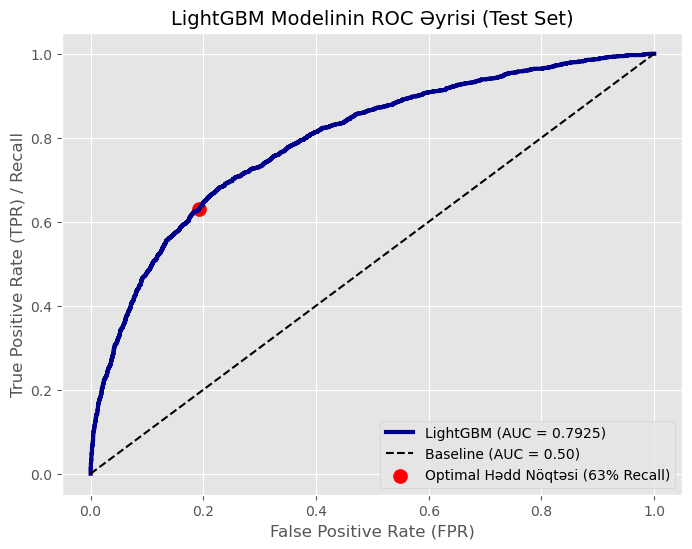

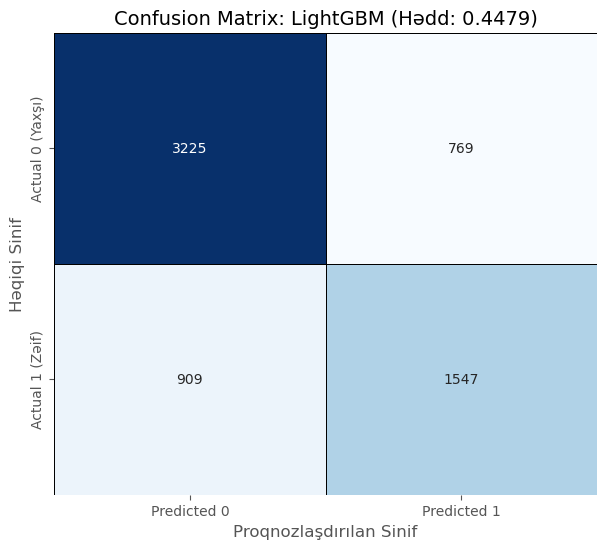

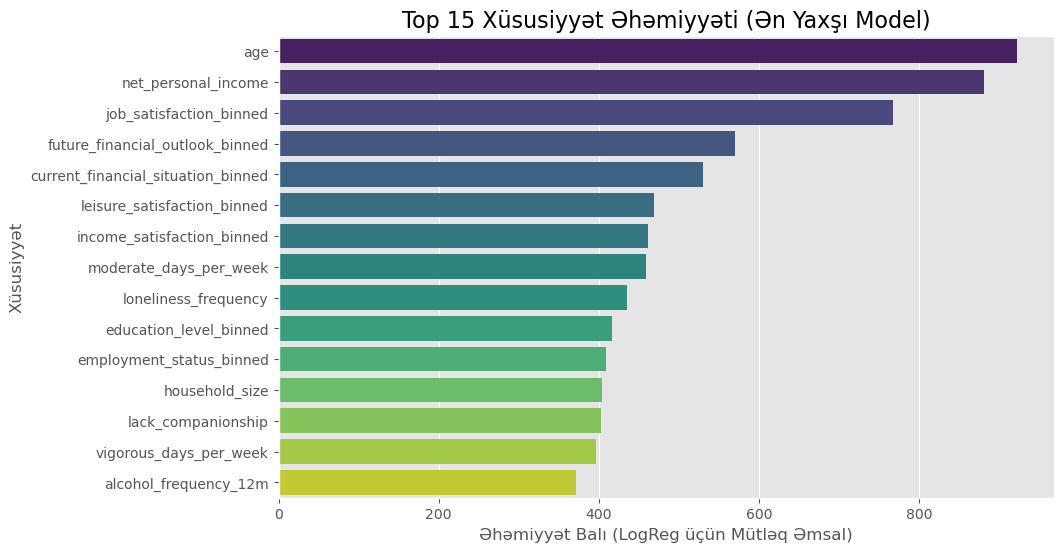


✅ Ən yaxşı model üçün bütün vizuallaşdırmalar tamamlandı və fayllar kimi yadda saxlanıldı (best_model_roc.png, best_model_confusion_matrix.png, best_model_feature_importance.png).


In [1969]:

def plot_confusion_matrix(model_name, y_true, y_pred, threshold):
    """Seçilmiş model üçün Confusion Matrix-i vizuallaşdırır və saxlayır."""
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, index=['Actual 0 (Yaxşı)', 'Actual 1 (Zəif)'], columns=['Predicted 0', 'Predicted 1'])
    
    plt.figure(figsize=(7, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', linewidths=.5, linecolor='black', cbar=False)
    plt.title(f'Confusion Matrix: {model_name} (Hədd: {threshold:.4f})', fontsize=14)
    plt.ylabel('Həqiqi Sinif', fontsize=12)
    plt.xlabel('Proqnozlaşdırılan Sinif', fontsize=12)
    plt.savefig('best_model_confusion_matrix.png') 
    plt.show()

def plot_feature_importance(model, features, top_n=15):
    """Ən yaxşı modelin xüsusiyyət əhəmiyyətini vizuallaşdırır və saxlayır."""
    if hasattr(model, 'feature_importances_'):
        importance_data = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importance_data = np.abs(model.coef_[0])
    else:
        print("XƏTA: Model feature importance-i dəstəkləmir.")
        return

    feature_importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': importance_data
    })
    
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)

    plt.figure(figsize=(10, top_n * 0.4))
    sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette='viridis')
    plt.title(f'Top {top_n} Xüsusiyyət Əhəmiyyəti (Ən Yaxşı Model)', fontsize=16)
    plt.xlabel('Əhəmiyyət Balı (LogReg üçün Mütləq Əmsal)', fontsize=12)
    plt.ylabel('Xüsusiyyət', fontsize=12)
    plt.savefig('best_model_feature_importance.png', bbox_inches='tight')
    plt.show()

# Dəyişənlərin tapılması (D bölməsinin nəticələri)
best_model_name = comparison_df.iloc[0]['Model']
best_model_data = all_results[best_model_name]

print(f"ƏN YAXŞI MODEL DƏRİNLİK TƏHLİLİ: {best_model_name}")

# --- 1. ƏN YAXŞI MODELİN ROC AUC QRAFİKİ ---
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, best_model_data['y_proba'])
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {best_model_data["auc"]:.4f})', color='darkblue', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline (AUC = 0.50)')
plt.scatter(fpr[np.argmin(np.abs(tpr - target_recall))], tpr[np.argmin(np.abs(tpr - target_recall))], 
            marker='o', color='red', s=100, label=f'Optimal Hədd Nöqtəsi ({target_recall*100:.0f}% Recall)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall')
plt.title(f'{best_model_name} Modelinin ROC Əyrisi (Test Set)', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('best_model_roc.png') # Qrafiki fayl kimi saxla
plt.show()

# --- 2. CONFUSION MATRIX QRAFİKİ ---
plot_confusion_matrix(
    best_model_name, 
    y_test, 
    best_model_data['y_pred_opt'], 
    best_model_data['optimal_threshold']
)

# --- 3. XÜSUSİYYƏT ƏHƏMİYYƏTİ (FEATURE IMPORTANCE) QRAFİKİ ---
plot_feature_importance(
    best_model_data['model'], 
    best_model_data['features'], 
    top_n=15
)

print("\n Ən yaxşı model üçün bütün vizuallaşdırmalar tamamlandı və fayllar kimi yadda saxlanıldı (best_model_roc.png, best_model_confusion_matrix.png, best_model_feature_importance.png).")


In [1475]:
# En son
# Bunu birde yoxla!
# En son Modelll

import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE

# --- Features ---
numeric_features = [
    'net_personal_income', 'age',
     'moderate_days_per_week', 'vigorous_days_per_week',
    'household_size', 'number_of_children'
]

binary_features = ['smoking_status', 'drinks_alcohol_past12m', 'gender']

categorical_features = [
    'lack_companionship','loneliness_frequency','employment_status_binned', 'current_financial_situation_binned',
    'future_financial_outlook_binned', 'marital_status_binned',
    'education_level_binned', 'alcohol_frequency_12m', 
    'drinks_per_typical_day_binned', 'urban_rural', 'country',
    'income_satisfaction_binned', 'leisure_satisfaction_binned', 'job_satisfaction_binned'
    ]

fruit_mapping = {
    'Never': 0,
    '1-3 Days': 1,
    '4-6 Days': 2,
    'Every Day': 3,
}
df['fruit_days_per_week'] = df['fruit_days_per_week'].map(fruit_mapping)

all_features = numeric_features + binary_features + categorical_features + ['fruit_days_per_week']

# --- Target ---
target_col = 'mental_health_binary'
y = (df[target_col] == 'Poor Mental Health').astype(int)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    df[all_features], y, test_size=0.2, random_state=42, stratify=y
)

# --- Preprocessing ---
# Numeric scaling
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Binary encoding
for col in binary_features:
    if col == 'gender':
        X_train[col] = (X_train[col] == 'Male').astype(int)
        X_test[col] = (X_test[col] == 'Male').astype(int)
    else:
        X_train[col] = (X_train[col] == 'Yes').astype(int)
        X_test[col] = (X_test[col] == 'Yes').astype(int)

# Mean target encoding for categorical features
for col in categorical_features:
    train_means = X_train.groupby(col)[target_col].mean() if target_col in X_train else y_train.groupby(X_train[col]).mean()
    global_mean = y_train.mean()
    X_train[col] = X_train[col].map(train_means).fillna(global_mean)
    X_test[col] = X_test[col].map(train_means).fillna(global_mean)


# --- SMOTE for oversampling ---
sm = SMOTE(random_state=42, n_jobs=-1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# --- LightGBM ---
lgb_model = lgb.LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    random_state=42,
    n_jobs=-1
)

# --- Hyperparameter grid for RandomizedSearchCV ---
param_dist = {
    'num_leaves': [31, 50, 70, 100, 127],
    'max_depth': [6, 8, 10, 12, 15],
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
    'n_estimators': [500, 800, 1000]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    lgb_model,
    param_distributions=param_dist,
    n_iter=100,
    scoring='roc_auc',
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# --- Fit with early stopping ---
random_search.fit(X_train_res, y_train_res, eval_set=[(X_test, y_test)], eval_metric='auc', callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=False)])

# --- Best estimator ---
best_model = random_search.best_estimator_
print("\nBest Hyperparameters:", random_search.best_params_)

# --- Predictions ---
y_proba_test = best_model.predict_proba(X_test)[:, 1]
y_proba_train = best_model.predict_proba(X_train)[:, 1]

# --- Optimal threshold tuning (Recall target ~0.63) ---
precision_curve, recall_curve, thresholds = precision_recall_curve(y_test, y_proba_test)
f1_scores = 2 * (precision_curve * recall_curve) / (precision_curve + recall_curve + 1e-8)

target_recall = 0.63
optimal_idx = np.argmin(np.abs(recall_curve - target_recall))
optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5

y_pred_test = (y_proba_test >= optimal_threshold).astype(int)
y_pred_train = (y_proba_train >= optimal_threshold).astype(int)

# --- Metrics function ---
def print_metrics(y_true, y_pred, y_proba, dataset="Train"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba)
    gini = 2 * auc - 1
    print(f"\n✅ {dataset} METRICS ✅")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1       : {f1:.4f}")
    print(f"AUC      : {auc:.4f}")
    print(f"Gini     : {gini:.4f}")
    return acc, prec, rec, f1, auc, gini

train_metrics = print_metrics(y_train, y_pred_train, y_proba_train, "Train")
test_metrics = print_metrics(y_test, y_pred_test, y_proba_test, "Test")

print(f"\nOptimal Threshold: {optimal_threshold:.4f}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[LightGBM] [Info] Number of positive: 15974, number of negative: 15974
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4881
[LightGBM] [Info] Number of data points in the train set: 31948, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Best Hyperparameters: {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'num_leaves': 31, 'n_estimators': 800, 'max_depth': 15, 'learning_rate': 0.07, 'colsample_bytree': 0.6}

✅ Train METRICS ✅
Accuracy : 0.7613
Precision: 0.6981
Recall   : 0.6574
F1       : 0.6772
AUC      : 0.8251
Gini     : 0.6503

✅ Test METRICS ✅
Accuracy : 0.7389
Precision: 0.6662
Recall   : 0.6299
F1       : 0.6476
AUC      : 0.7919
Gini     : 0.583